# Analysis for the Best Option for HbA1c Reduction (**Novodra vs. Auralin)**

## **DATA SUMMARY:**

This dataset includes information on 500 patients, out of which 350 participated in a clinical trial. None of these patients were previously using Novodra (a well-known injectable insulin) or Auralin (the oral insulin being tested) as their primary insulin source. All patients had elevated HbA1c levels.

Initially, all 350 patients were treated with Novodra to establish baseline HbA1c levels and insulin doses. After 4 weeks, which is insufficient to fully observe the changes in HbA1c due to switching to Auralin or continuing with Novodra, the patients were divided as follows:

* 175 patients transitioned to Auralin for 24 weeks.
* 175 patients continued using Novodra for 24 weeks. Data on patients experiencing adverse effects is also recorded.

**Additional details:** Insulin resistance varies among individuals, making it necessary to record both the initial and final median daily doses to calculate the change in dosage. Testing drugs and medical products on the people they are intended to benefit is crucial. Clinical trials must include participants of different ages, races, sexes, and ethnic groups. This diversity is reflected in the patient dataset.

### **Table -> patients:**

* **patient_id:** A unique identifier for each patient in the pharmaceutical company’s Master Patient Index, which is producing Auralin.

* **assigned_sex:** The sex assigned to each patient at birth (male or female).

* **given_name:** The first name of each patient.
* **surname:** The last name of each patient.
* **address:** The primary address for each patient.
* **city:** The city associated with the patient's primary address.
* **state:** The state associated with the patient's primary address.
* **zip_code:**The postal code associated with the patient's primary address.
* **country:** The country associated with the patient's primary address (all patients are located in the United States for this clinical trial).
* **contact:** The phone number and email information for each patient.
* **birthdate:** The birthdate of each patient (month/day/year). The inclusion criteria for this clinical trial require participants to be 18 years or older, with no upper age limit due to the growing prevalence of diabetes among the elderly.
* **weight:** The weight of each patient in pounds (lbs).
* **height:** The height of each patient in inches (in).
* **bmi:** The Body Mass Index (BMI) of each patient, calculated using their height and weight. BMI = kg/m², where kg is the weight in kilograms and m² is height in meters squared. A BMI of 25.0 or higher is considered overweight, while a healthy range is 18.5 to 24.9. The inclusion criteria for this trial require a BMI between 16 and 38.

### **Table -> treatments and treatment_cut:**
* **given_name:** The first name of each patient in the Master Patient Index who participated in the clinical trial.
* **surname:** The last name of each patient in the Master Patient Index who participated in the clinical trial.
* **auralin:** The baseline median daily dose of insulin one week before switching to Auralin (number before the dash) and the ending median daily dose after 24 weeks of treatment (number after the dash). Both are measured in units (u), which is the standard international unit for insulin measurement.
* **novodra:** Similar to Auralin, but for patients who continued treatment with Novodra.
* **hba1c_start:** The patient’s HbA1c level at the beginning of the first week of treatment. HbA1c measures average blood sugar levels over the past three months and is a key indicator of diabetes control. It is recommended to be measured 2 to 4 times per year, with results expressed as a percentage.
* **hba1c_end:** The patient’s HbA1c level at the end of the final week of treatment.
* **hba1c_change:** The change in the patient’s HbA1c level from the start to the end of treatment, calculated as hba1c_start - hba1c_end. For Auralin to be considered effective, it must be "noninferior" to Novodra, the current insulin standard. Noninferiority is statistically defined as the upper limit of the 95% confidence interval for the difference between the mean HbA1c changes of Novodra and Auralin (Novodra minus Auralin) being less than 0.4%.

###**Table -> adverse_reactions:**
* **given_name:** The first name of each patient in the Master Patient Index who participated in the clinical trial and reported an adverse reaction.
* **surname:** The last name of each patient in the Master Patient Index who participated in the clinical trial and reported an adverse reaction.
* **adverse_reaction:** The adverse reaction reported by the patient. This includes reactions experienced by patients treated with both Auralin and Novodra.

# Patients Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew

In [ ]:
patients = pd.read_csv("/content/patients_cleaned.csv")
patients.head()

patient_id given_name  surname    full_name assigned_sex      weight  \
0           1        Zoe  Wellish  Zoe Wellish       female   55.202146   
1           2     Pamela     Hill  Pamela Hill       female   53.886730   
2           3        Jae   Debord   Jae Debord         male   80.648658   
3           4       Liem     Phan    Liem Phan         male  100.198473   
4           5        Tim  Neudorf  Tim Neudorf         male   87.225742   

   height   birthdate  age  phone_number                      email  \
0  1.6764  1976-07-10   43    9517199170   ZoeWellish@superrito.com   
1  1.6764  1967-04-03   52    2175693204       PamelaSHill@cuvox.de   
2  1.8034  1980-02-19   39    4023636804       JaeMDebord@gustr.com   
3  1.7780  1951-07-26   68    7326368246  PhanBaLiem@jourrapide.com   
4  0.6858  1928-02-18   91    3345157487        TimNeudorf@cuvox.de   

                     address               city       state  zip_code  \
0       576 Brown Bear Drive  Rancho California  California     92390   
1  2370 University Hill Road          Armstrong    Illinois     61812   
2      1493 Poling Farm Road               York    Nebraska     68467   
3        2335 Webster Street         Woodbridge  New Jersey      7095   
4       1428 Turkey Pen Lane             Dothan     Alabama     36303   

         country         bmi      bmi_status  
0  United States   19.642676   Normal weight  
1  United States   19.174609   Normal weight  
2  United States   24.797792   Normal weight  
3  United States   31.695499         Obesity  
4  United States  185.459767  Severe Obesity

In [ ]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    498 non-null    int64  
 1   given_name    498 non-null    object 
 2   surname       498 non-null    object 
 3   full_name     498 non-null    object 
 4   assigned_sex  498 non-null    object 
 5   weight        498 non-null    float64
 6   height        498 non-null    float64
 7   birthdate     498 non-null    object 
 8   age           498 non-null    int64  
 9   phone_number  498 non-null    int64  
 10  email         498 non-null    object 
 11  address       498 non-null    object 
 12  city          498 non-null    object 
 13  state         498 non-null    object 
 14  zip_code      498 non-null    int64  
 15  country       498 non-null    object 
 16  bmi           498 non-null    float64
 17  bmi_status    498 non-null    object 
dtypes: float64(3), int64(4), objec

In [ ]:
patients[['weight','height','age','bmi']].describe()

weight      height         age         bmi
count  498.000000  498.000000  498.000000  498.000000
mean    78.638826    1.691140   60.552209   27.817951
std     15.458641    0.111768   22.572002    8.870835
min     22.135290    0.685800   20.000000    8.644436
25%     67.505829    1.600200   41.000000   23.209788
50%     79.129124    1.701800   61.000000   27.321200
75%     90.593662    1.752600   81.000000   31.863897
max    116.074193    2.006600   98.000000  185.459767

In [ ]:
patients.isnull().sum()

patient_id      0
given_name      0
surname         0
full_name       0
assigned_sex    0
weight          0
height          0
birthdate       0
age             0
phone_number    0
email           0
address         0
city            0
state           0
zip_code        0
country         0
bmi             0
bmi_status      0
dtype: int64

In [ ]:
patients.shape

(498, 18)

### Insights of Patients weight,height,age,bmi Data

**Data Overview**: The dataset contains 498 entries and 18 columns. The dataset contains various information about the patients such as (name, phone number, email, weight, height,address, city, state, country, BMI).

**Age Distribution**:
   - The age range of patients are between 20 and 98 years.
   - The mean age is 60.55 years,indicating that the dataset is skewed toward an older population.

**Weight and Height**:
   - The mean weight of patients is 78.64 kg, with a minimum of 22.14 kg and a maximum of 116.07 kg.
   - The average height is 1.69 meters, ranging from 0.69 meters to 2.01 meters.

**BMI Insights**:
   - The average BMI (Body Mass Index) is 27.82, which falls into the "overweight" category (BMI between 25-29.9).
   - The BMI range extends from 8.64 to 185.46.
   - Most patients (25th to 75th percentile) have BMI values between 23.21 and 31.8,which falls under the "normal" and "overweight" statuses.

**Numerical Columns**:
   - `weight`
   - `height`
   - `age`
   - `bmi`

**Categorical Columns**:
   - `assigned_sex`
   - `city`
   - `state`
   - `country`
   - `bmi_status`

## Univariate Analysis

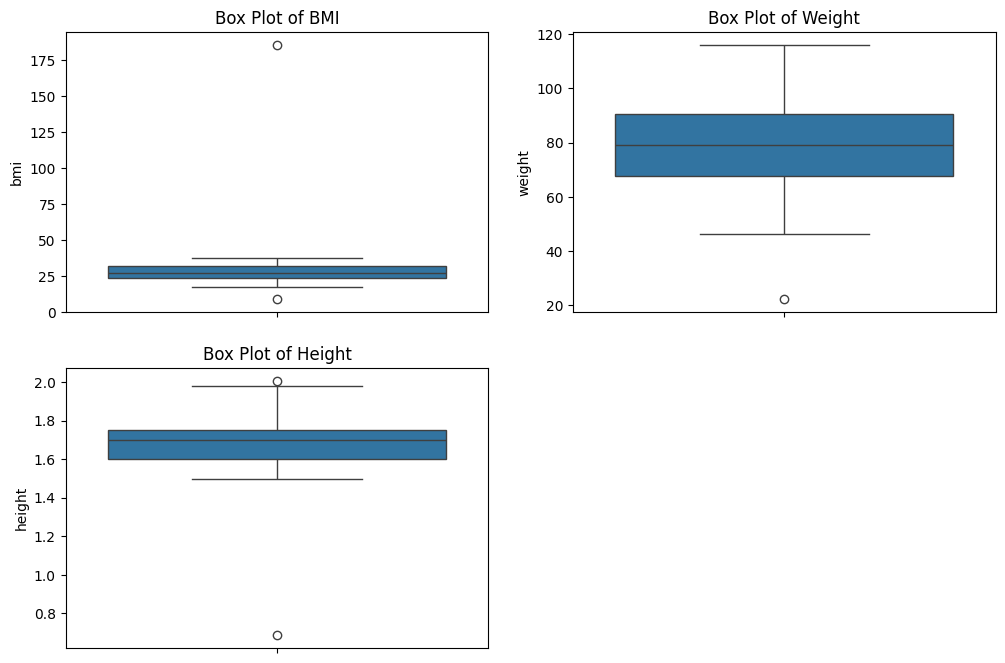

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y=patients['bmi'])
plt.title('Box Plot of BMI')

plt.subplot(2, 2, 2)
sns.boxplot(y=patients['weight'])
plt.title('Box Plot of Weight')

plt.subplot(2, 2, 3)
sns.boxplot(y=patients['height'])
plt.title('Box Plot of Height')

plt.show()


In [ ]:
patients['weight'].sort_values(ascending=False).head(1)

480    116.074193
Name: weight, dtype: float64

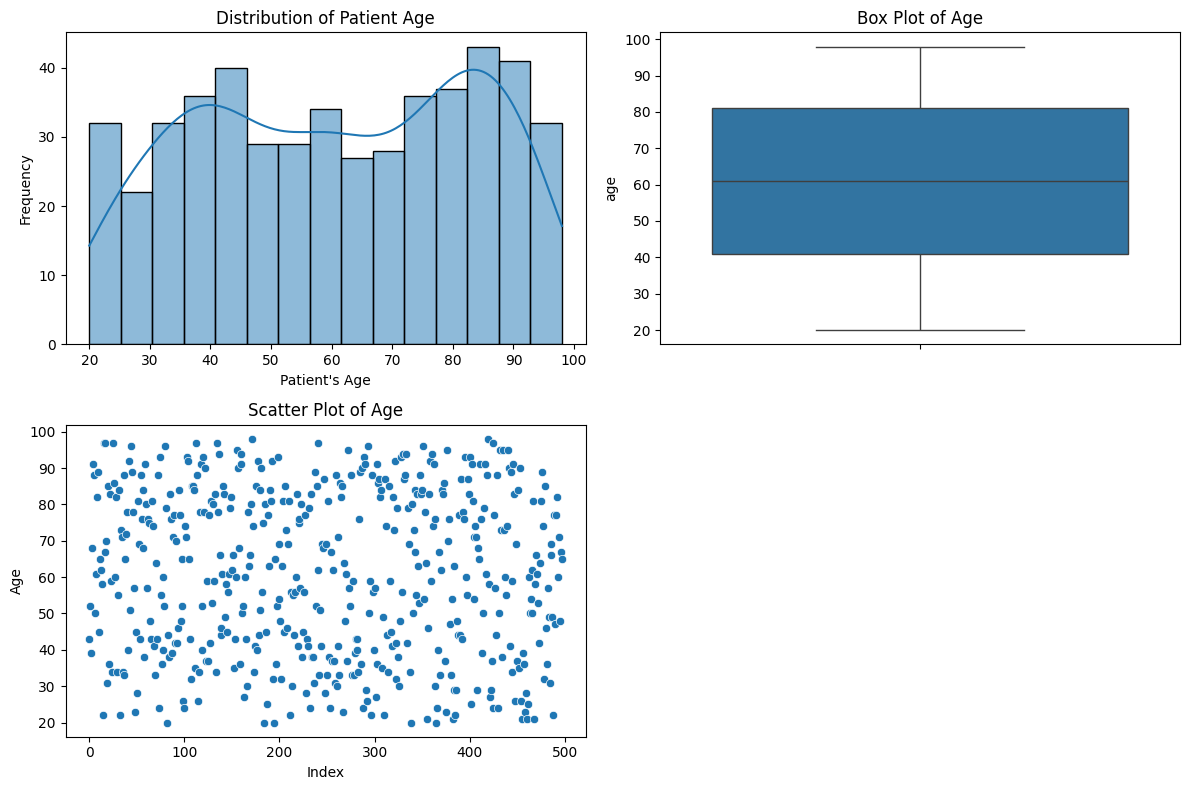

In [ ]:
plt.figure(figsize=(12, 8))

# Histogram of Patient's Age
plt.subplot(2, 2, 1)
sns.histplot(data=patients, x="age", kde=True, bins=15)
plt.xlabel("Patient's Age")
plt.ylabel("Frequency")
plt.title("Distribution of Patient Age")

# Box Plot of Age
plt.subplot(2, 2, 2)
sns.boxplot(y=patients['age'])
plt.title('Box Plot of Age')

# Scatter Plot of Age
plt.subplot(2, 2, 3)
sns.scatterplot(x=patients.index, y=patients['age'])
plt.title('Scatter Plot of Age')
plt.xlabel('Index')
plt.ylabel('Age')

plt.tight_layout()
plt.show()


#### Insights of Patient's Age:

- Patient's age is ranging between 20 to 100 years.
- The age group with the most patients is 80-90 years, with over 40 patients.
- The age groups 40-50 years and 80-90 years show peaks, indicating higher patient frequencies.
- The patient ages are fairly evenly distributed across different age groups.
- After 90 years, the number of patients decreases significantly.
- Most patients are middle-aged (30-70 years old).
- There are a few older patients above 70 years.
- Most patients have similar ages.
- There are no extremely young or old patients.


In [ ]:
Q1 = patients['weight'].quantile(0.25)
Q3 = patients['weight'].quantile(0.75)
IQR = Q3 - Q1
IQR

23.087832800000015

In [ ]:
skew(patients['weight'])

-0.095803661697745

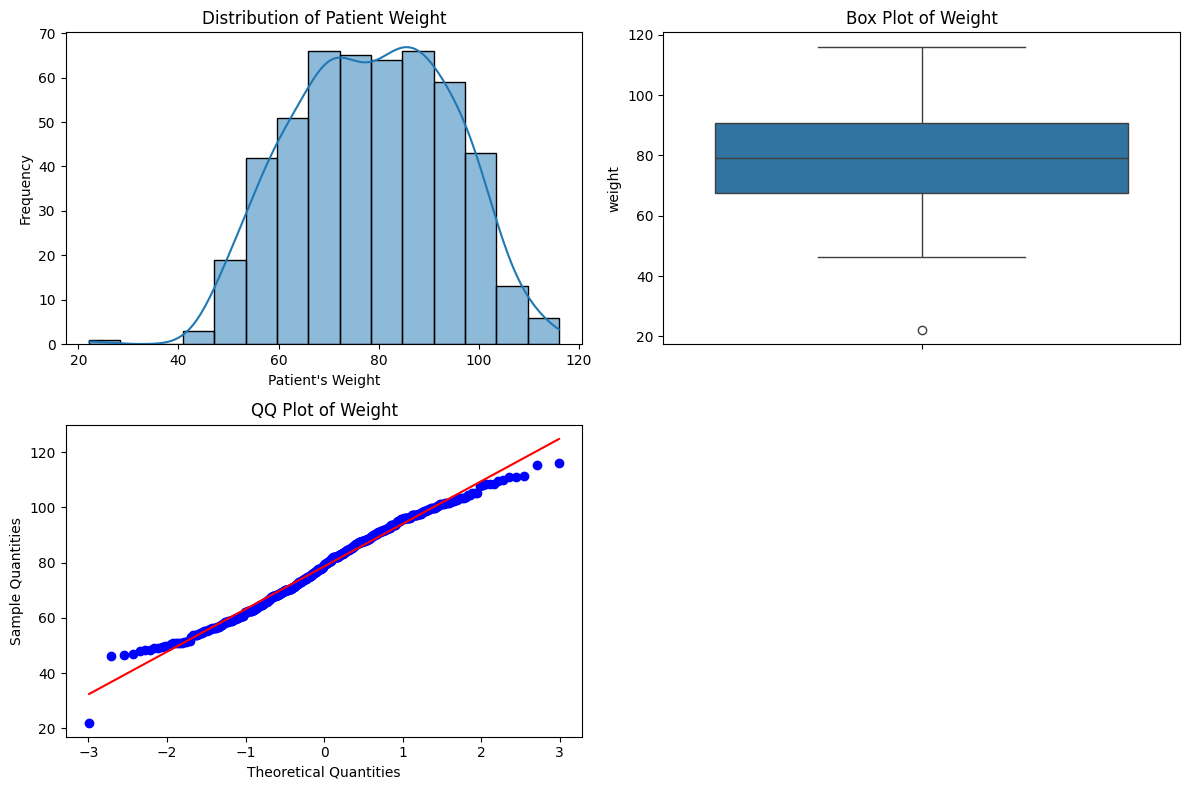

In [ ]:
plt.figure(figsize=(12, 8))

# Histogram of Patient's Weight
plt.subplot(2, 2, 1)
sns.histplot(data=patients, x="weight", kde=True, bins=15)
plt.xlabel("Patient's Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Patient Weight")

# Box Plot of Weight
plt.subplot(2, 2, 2)
sns.boxplot(y=patients['weight'])
plt.title('Box Plot of Weight')

#QQPlot of Weight
plt.subplot(2, 2, 3)
stats.probplot(patients['weight'], dist="norm", plot=plt)
plt.title('QQ Plot of Weight')
plt.xlabel('Theoretical Quantities')
plt.ylabel('Sample Quantities')

plt.tight_layout()
plt.show()


#### Insights of Patient's Weight
- The patient population seems to have a relatively healthy weight distribution with the majority of patients weighing between 60 and 80 kilograms.
- There are a few outliers on the low ends of the weight distribution, suggesting potential health concerns for those individuals.
- The relationship between weight and the index variable is not clear from the scatter plot.

In [ ]:
q1 = patients['weight'].quantile(.25)
q3 = patients['weight'].quantile(.75)
minimum_weight = q1 - (1.5 * (q3-q1))
print(minimum)
maximum_weight = q3 + (1.5 * (q3-q1))
print(maximum)

-131.8899933
224.08385549999997


In [ ]:
patients[patients['weight'] < minimum_weight]

patient_id given_name   surname         full_name assigned_sex    weight  \
210         211    Camilla  Zaitseva  Camilla Zaitseva       female  22.13529   

     height   birthdate  age  phone_number                          email  \
210  1.6002  1938-11-26   81    3302022145  CamillaZaitseva@superrito.com   

                 address     city state  zip_code        country       bmi  \
210  4689 Briarhill Lane  Wooster  Ohio     44691  United States  8.644436   

      bmi_status  
210  Underweight

In [ ]:
Q1 = patients['height'].quantile(0.25)
Q3 = patients['height'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.1524000000000001

In [ ]:
skew(patients['height'])

-1.3280431478510388

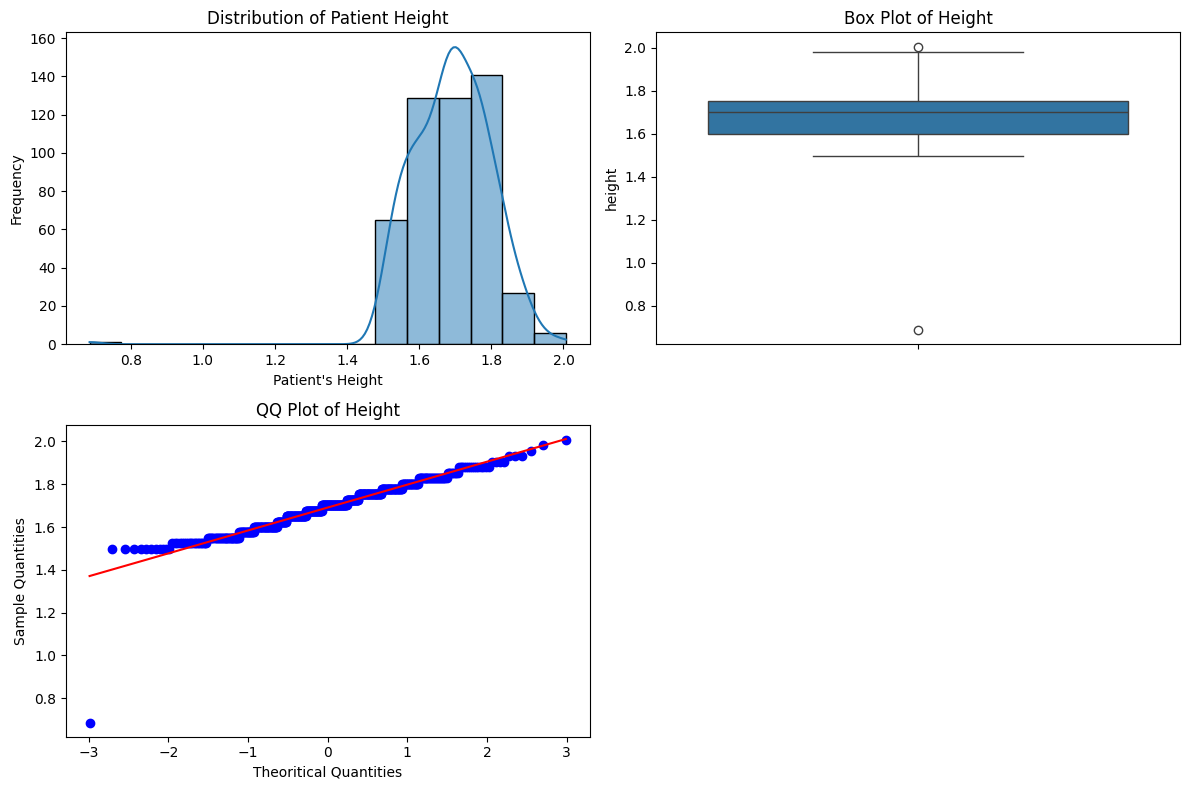

In [ ]:
plt.figure(figsize=(12, 8))

# Histogram of Patient's Height
plt.subplot(2, 2, 1)
sns.histplot(data=patients, x="height", kde=True, bins=15)
plt.xlabel("Patient's Height")
plt.ylabel("Frequency")
plt.title("Distribution of Patient Height")

# Box Plot of Height
plt.subplot(2, 2, 2)
sns.boxplot(y=patients['height'])
plt.title('Box Plot of Height')

# Scatter Plot of Height
plt.subplot(2, 2, 3)
stats.probplot(patients['height'],dist = "norm", plot=plt)
plt.title("QQ Plot of Height")
plt.xlabel("Theoritical Quantities")
plt.ylabel("Sample Quantities")

plt.tight_layout()
plt.show()


#### Insights Of Patient's Height

- The patient population seems to have a relatively healthy height distribution with the majority of patients between 1.6 and 1.8 meters tall.
- There are a few outliers on both the high and low ends of the height distribution, suggesting potential health concerns for those individuals.
- The relationship between height and the index variable is not clear from the scatter plot.

In [ ]:
q1 = patients['height'].quantile(0.25)
q3 = patients['height'].quantile(0.75)
minimum_height = q1 - (1.5 * (q3-q1))
print(minimum_height)
maximum_height = q3 + (1.5 * (q3-q1))
print(maximum_height)

1.3715999999999997
1.9812


In [ ]:
patients[patients['height'] < minimum_height]

patient_id given_name  surname    full_name assigned_sex     weight  \
4           5        Tim  Neudorf  Tim Neudorf         male  87.225742   

   height   birthdate  age  phone_number                email  \
4  0.6858  1928-02-18   91    3345157487  TimNeudorf@cuvox.de   

                address    city    state  zip_code        country         bmi  \
4  1428 Turkey Pen Lane  Dothan  Alabama     36303  United States  185.459767   

       bmi_status  
4  Severe Obesity

In [ ]:
patients[patients['height'] > maximum_height]

patient_id given_name  surname       full_name assigned_sex     weight  \
413         419     Mahmud  Kadyrov  Mahmud Kadyrov         male  97.612998   

     height   birthdate  age  phone_number                    email  \
413  2.0066  1980-06-18   39    7017452700  MahmudKadyrov@gustr.com   

                      address     city         state  zip_code        country  \
413  3390 Hidden Meadow Drive  Stanton  North Dakota     58571  United States   

           bmi     bmi_status  
413  24.242982  Normal weight

10.228624518633186
44.845059854809904


In [ ]:
patients

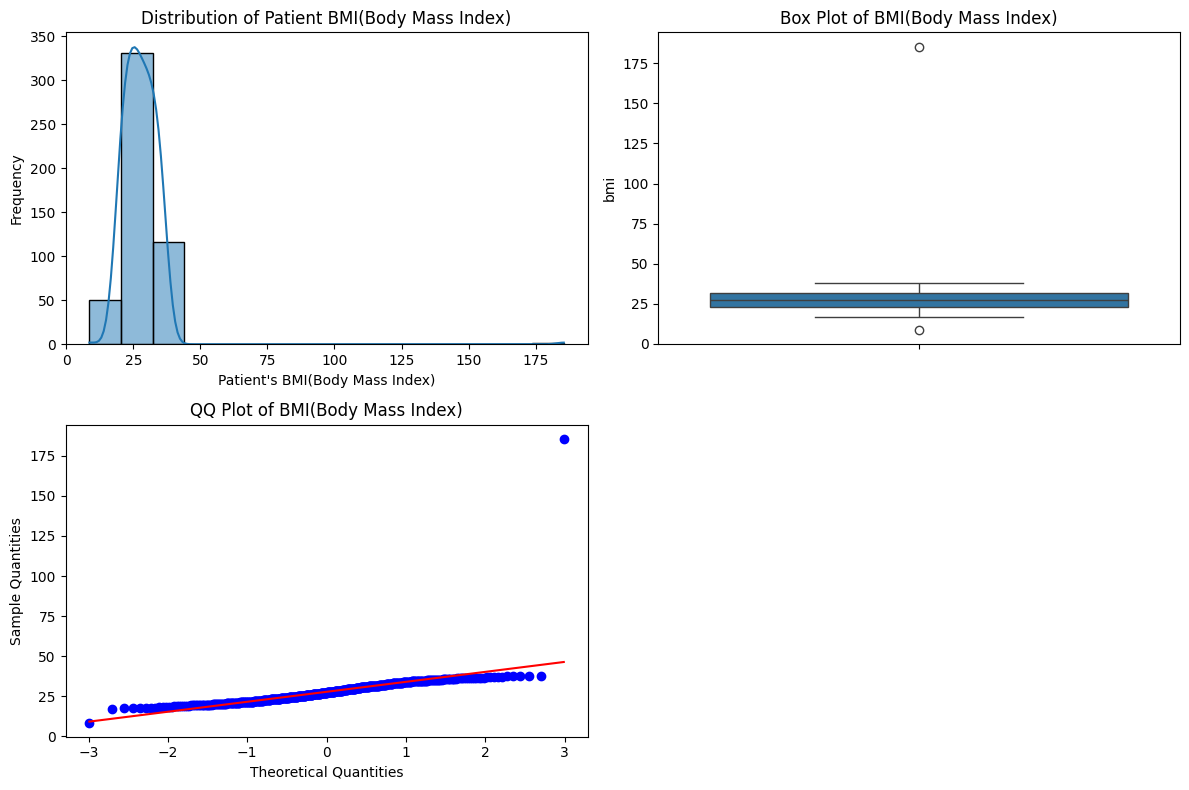

In [ ]:
plt.figure(figsize=(12, 8))

# Histogram of Patient's BMi
plt.subplot(2, 2, 1)
sns.histplot(data=patients, x="bmi", kde=True, bins=15)
plt.xlabel("Patient's BMI(Body Mass Index)")
plt.ylabel("Frequency")
plt.title("Distribution of Patient BMI(Body Mass Index)")

# Box Plot of BMI
plt.subplot(2, 2, 2)
sns.boxplot(y=patients['bmi'])
plt.title('Box Plot of BMI(Body Mass Index)')

# Scatter Plot of BMI
plt.subplot(2, 2, 3)
stats.probplot(patients['bmi'], dist="norm", plot=plt)
plt.title('QQ Plot of BMI(Body Mass Index)')
plt.xlabel('Theoretical Quantities')
plt.ylabel('Sample Quantities')

plt.tight_layout()
plt.show()


#### Insights Of BMI(Body Mass Index)

- The patient population seems to have a relatively healthy BMI distribution with the majority of patients falling within a normal weight range.
- There are a few outliers on both the high and low ends of the BMI distribution, suggesting potential health concerns for those individuals.
- There is no strong linear correlation between BMI and the index variable. This Indicates that BMI is not a major determinant of the index value.

In [ ]:
q1 = patients['bmi'].quantile(.25)
q3 = patients['bmi'].quantile(.75)
minimum_bmi = q1 - (1.5 * (q3-q1))
print(minimum_bmi)
maximum_bmi = q3 + (1.5 * (q3-q1))
print(maximum_bmi)

10.228624518633186
44.845059854809904


In [ ]:
patients[patients['bmi'] < minimum_bmi]

patient_id given_name   surname         full_name assigned_sex    weight  \
210         211    Camilla  Zaitseva  Camilla Zaitseva       female  22.13529   

     height   birthdate  age  phone_number                          email  \
210  1.6002  1938-11-26   81    3302022145  CamillaZaitseva@superrito.com   

                 address     city state  zip_code        country       bmi  \
210  4689 Briarhill Lane  Wooster  Ohio     44691  United States  8.644436   

      bmi_status  
210  Underweight

In [ ]:
patients[patients['bmi'] > maximum_bmi]

patient_id given_name  surname    full_name assigned_sex     weight  \
4           5        Tim  Neudorf  Tim Neudorf         male  87.225742   

   height   birthdate  age  phone_number                email  \
4  0.6858  1928-02-18   91    3345157487  TimNeudorf@cuvox.de   

                address    city    state  zip_code        country         bmi  \
4  1428 Turkey Pen Lane  Dothan  Alabama     36303  United States  185.459767   

       bmi_status  
4  Severe Obesity

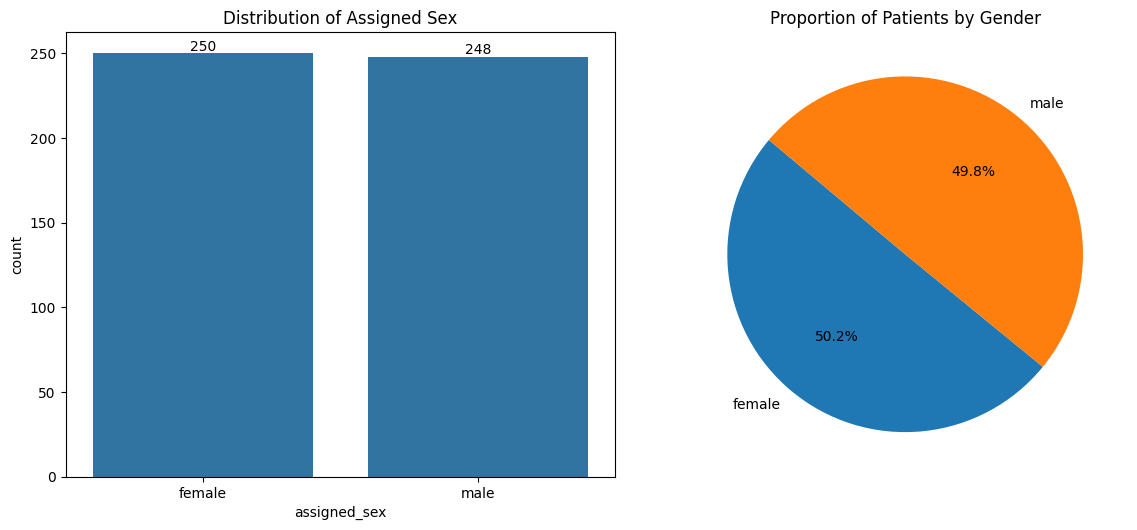

In [ ]:
plt.figure(figsize=(12, 10))

# Count Plot for Gender
plt.subplot(2, 2, 1)
ax = sns.countplot(data=patients, x='assigned_sex', order=patients['assigned_sex'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Assigned Sex')

# Pie Chart for Proportion of Patients by Gender
plt.subplot(2, 2, 2)
gender_counts = patients['assigned_sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Patients by Gender')

# Adjust layout
plt.tight_layout()
plt.show()


#### Insights Of Patient's Gender
- The count of male and female patients is relatively balanced. There are approximately equal numbers of patients in both categories.
- The proportion of female patients is slightly higher than male patients, with 50.2% of the patients being female and 49.8% being male.
- The patient population is fairly evenly divided between male and female genders.

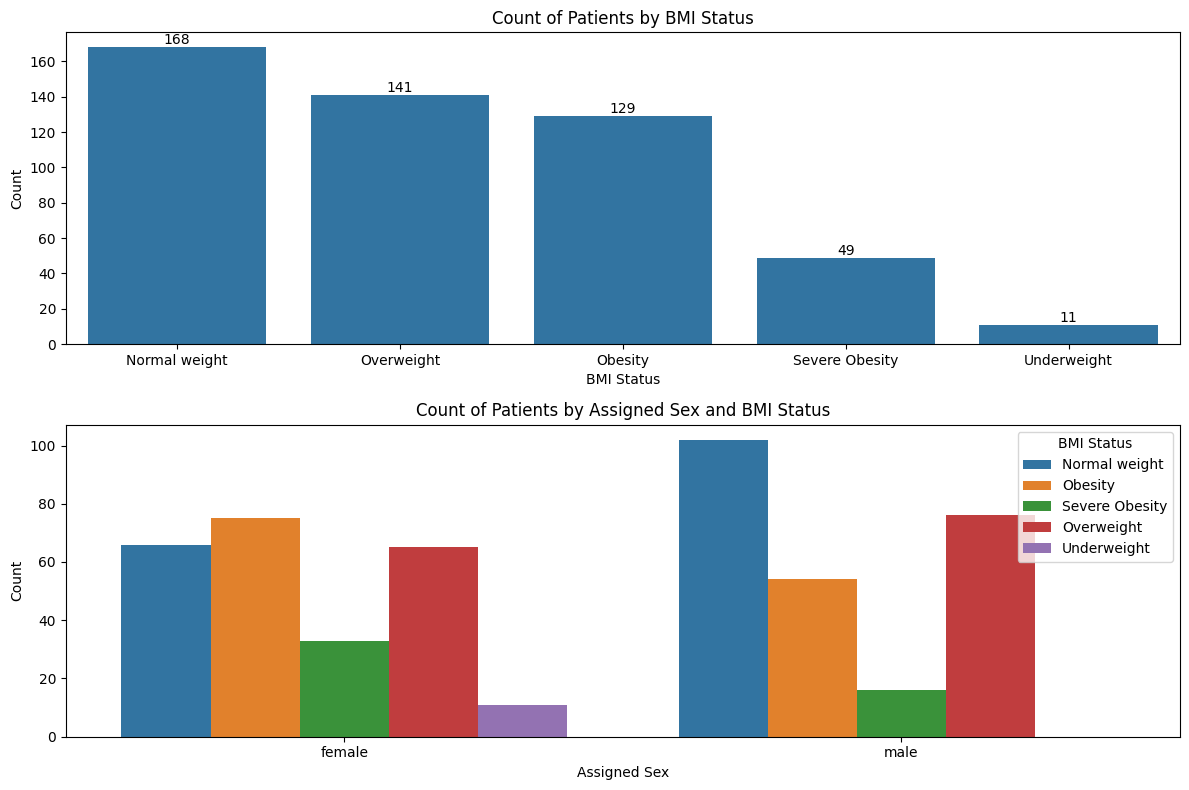

In [ ]:
plt.figure(figsize=(12, 8))

# Count Plot for BMI Status
plt.subplot(2, 1, 1)
ax = sns.countplot(data=patients, x='bmi_status', order=patients['bmi_status'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Count of Patients by BMI Status')
plt.xlabel('BMI Status')
plt.ylabel('Count')

# Stacked Bar Plot for Assigned Sex and BMI Status
plt.subplot(2, 1, 2)
ax2 = sns.countplot(data=patients, x='assigned_sex', hue='bmi_status')
plt.title('Count of Patients by Assigned Sex and BMI Status')
plt.xlabel('Assigned Sex')
plt.ylabel('Count')
plt.legend(title='BMI Status')

plt.tight_layout()
plt.show()


#### Insights Of BMI(Body Mass Index)
- Obesity is the most common BMI status among the patients, followed by normal weight.
- The lowest number of patients fall into the underweight category.
- The distribution of patients across the BMI statuses is relatively skewed, with a higher proportion of patients in the overweight and obese categories.
- There are notable differences in the distribution of BMI statuses between males and females.
- Females have a slightly higher prevalence of obesity compared to males.Males have a slightly higher prevalence of underweight compared to females.


## Bi-Veriate Analysis

### Numerical VS Numerical

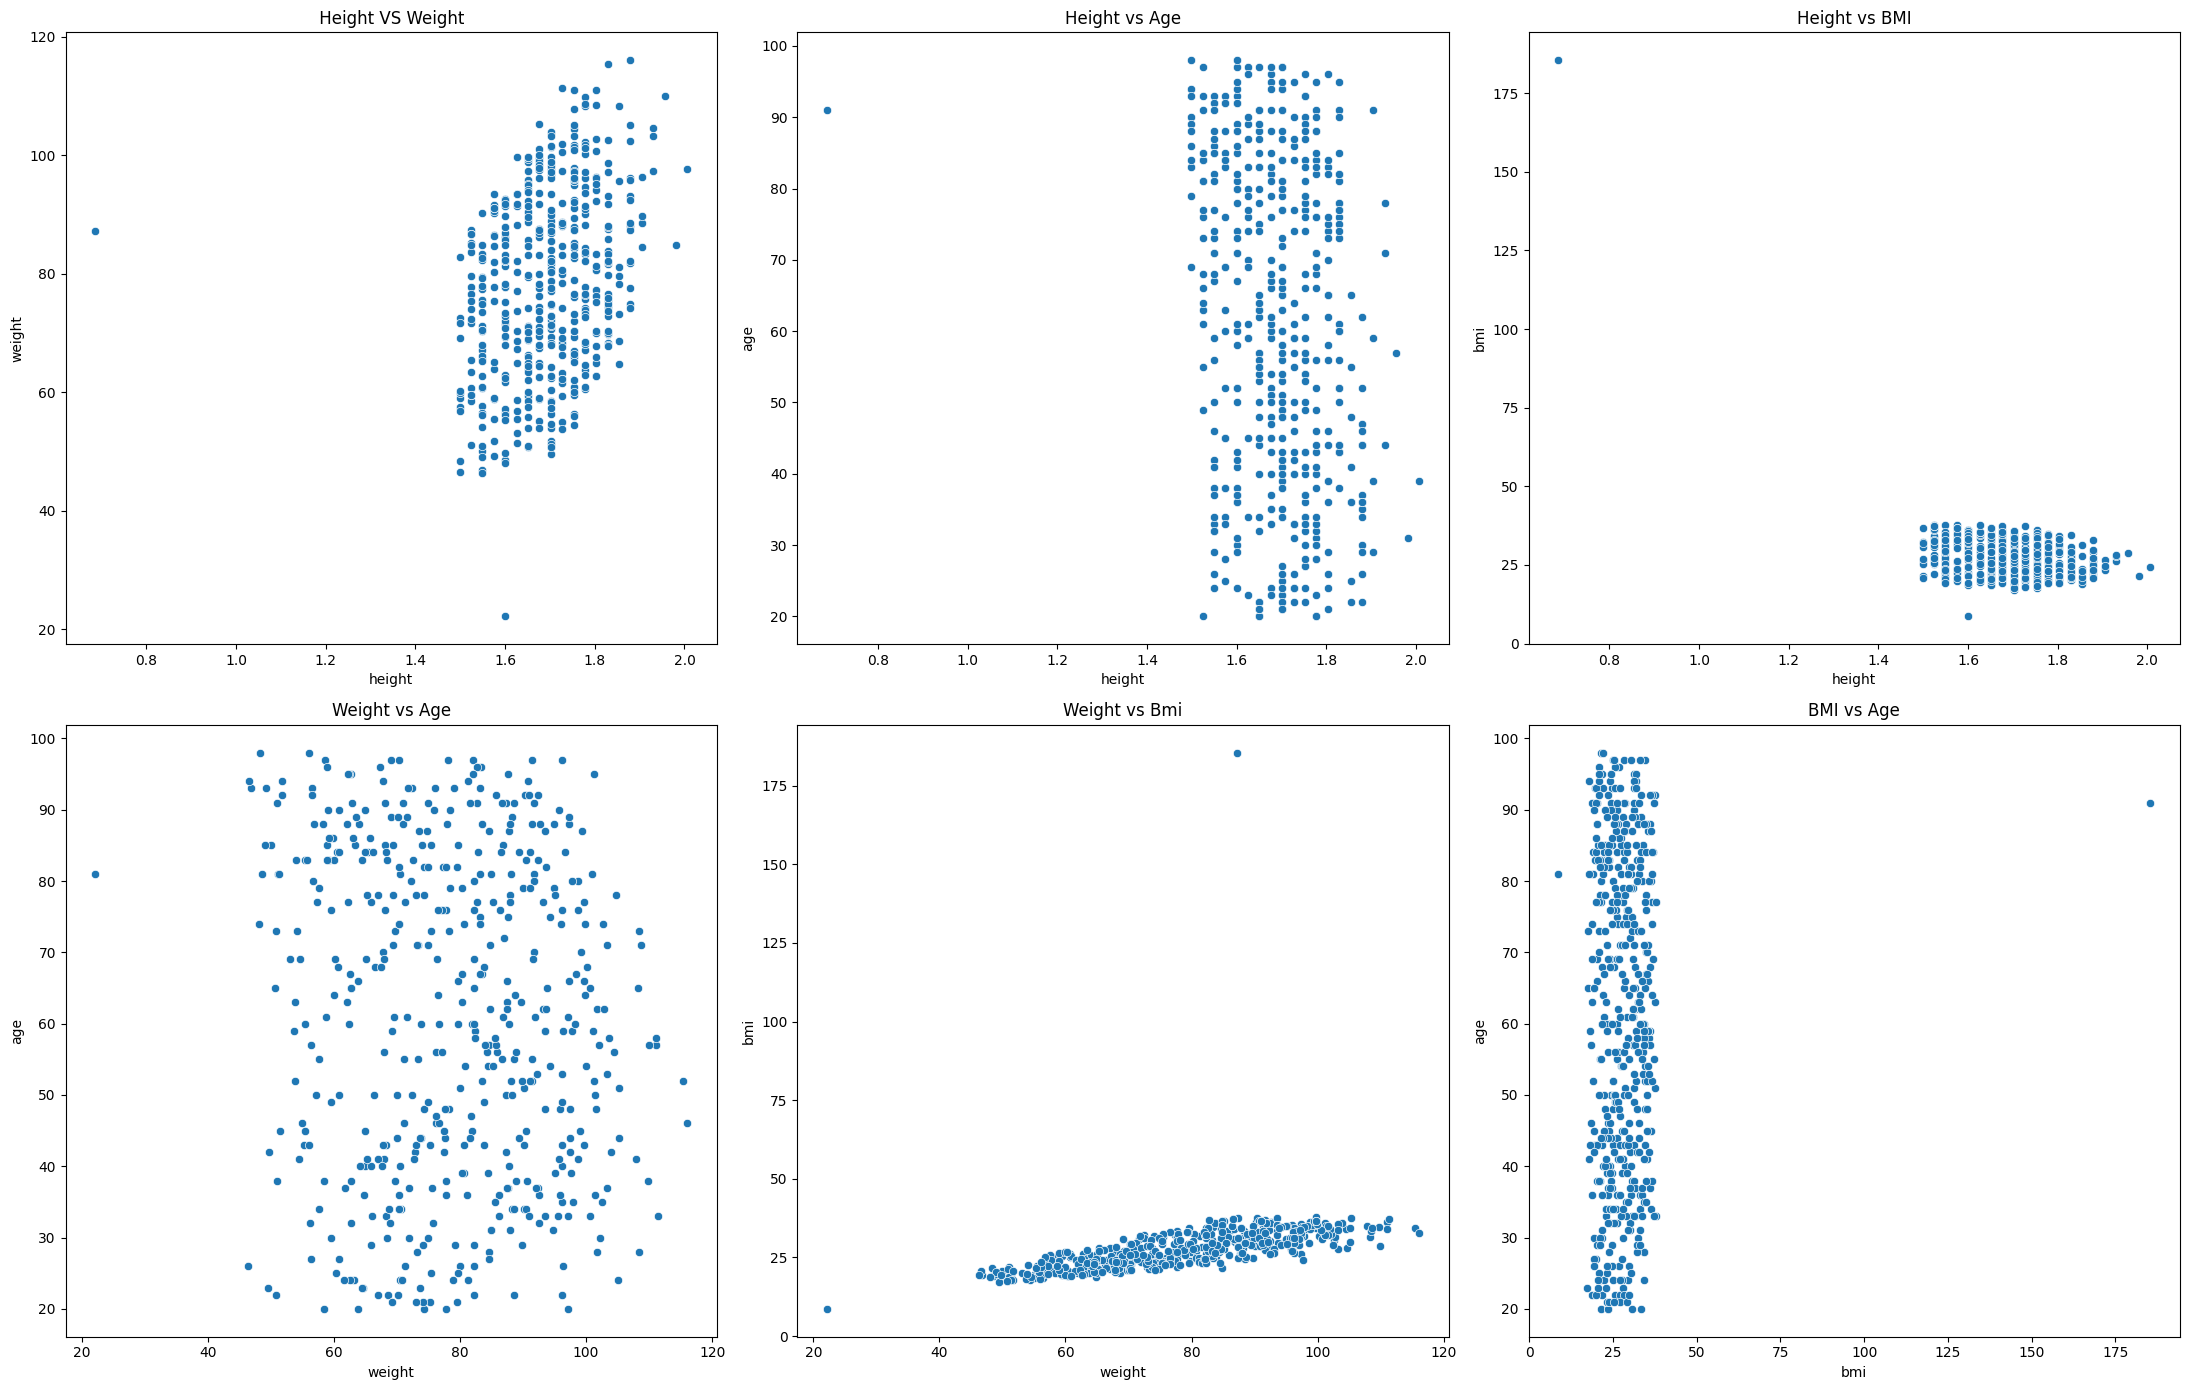

In [ ]:
plt.figure(figsize = (22,14))

plt.subplot(2,3,1)
sns.scatterplot(x='height', y='weight', data=patients)
plt.title(' Height VS Weight ')

plt.subplot(2,3,2)
sns.scatterplot(x='height', y='age', data=patients)
plt.title('Height vs Age')

plt.subplot(2,3,3)
sns.scatterplot(x='height', y='bmi', data=patients)
plt.title('Height vs BMI')

plt.subplot(2,3,4)
sns.scatterplot(x='weight', y='age', data=patients)
plt.title('Weight vs Age')

plt.subplot(2,3,5)
sns.scatterplot(x='weight', y='bmi', data=patients)
plt.title('Weight vs Bmi')

plt.subplot(2,3,6)
sns.scatterplot(x='bmi', y='age', data=patients)
plt.title('BMI vs Age')

plt.tight_layout()
plt.show()

#### Insights of Numerical VS Numerical Fields

**Height vs Weight**:
   - Taller people generally weigh more, showing a **positive relationship**.
   - Some people weigh much more or much less than expected for their height, indicating **outliers**.

**Height vs Age**:
   - **No strong link** between height and age; people of different ages have similar heights.
   - Most people are between **1.5 to 1.8 meters** tall.

**Height vs BMI**:
   - People with a **BMI under 50** are usually between **1.5 to 1.8 meters** tall.
   - One person is about **1.7 meters tall** with a BMI of **175**, which seems like an error.

**Weight vs Age**:
   - **No clear link** between weight and age; people of all ages have different weights.
   - Most people weigh between **40 to 100 kilograms**.

**Weight vs BMI**:
   - As weight goes up, **BMI increases** too.
   - One unusual person has a **BMI of 175** but weighs only **60 kg**, likely a data mistake.

**BMI vs Age**:
   - **No clear pattern** between BMI and age; most people have a BMI between **25 and 50**.
   - One person around **90 years old** has a BMI of **175**, which seems incorrect.

### Numirical VS Categorical

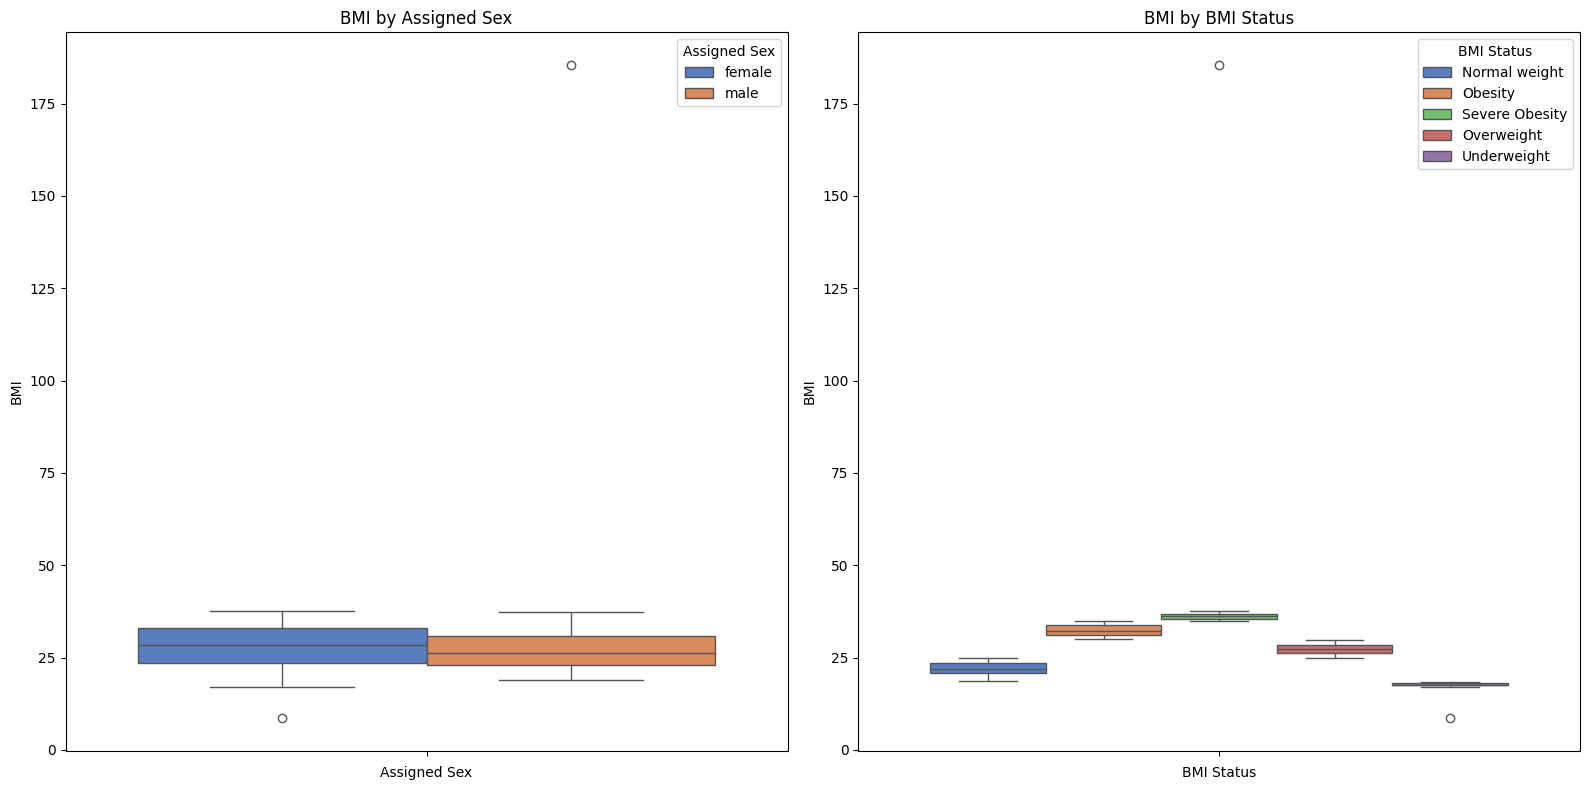

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(y='bmi', data=patients, hue='assigned_sex', palette='muted')
plt.title('BMI by Assigned Sex')
plt.xlabel('Assigned Sex')
plt.ylabel('BMI')
plt.legend(title='Assigned Sex')

plt.subplot(1, 2, 2)
sns.boxplot(y='bmi', hue='bmi_status', data=patients, palette='muted')
plt.title('BMI by BMI Status')
plt.xlabel('BMI Status')
plt.ylabel('BMI')
plt.legend(title='BMI Status')

plt.tight_layout()
plt.show()


#### Insights of Numerical VS Categorical Fields

**BMI by Assigned Sex**
- **Gender Differences**:On average, females have a **lower median BMI** compared to males. This means that, generally, females weigh less relative to their height than males do.
  
- **Spread of BMI Values**:The **Interquartile Range (IQR)**, which shows how spread out the middle 50% of BMI values are **similar for both genders**. This indicates that the variability in BMI is comparable between males and females.
  
- **Outliers**:There is **a few outliers** in both the male and female groups, particularly among individuals with higher BMI values.

**BMI by BMI Status**
- **Distribution of Categories**:The box plots effectively illustrate how BMI values are distributed among different **BMI status categories**: underweight, normal weight, overweight, and obese.
  
- **Normal Weight**:Individuals classified as **normal weight** have a **lower median BMI** than those in the overweight and obese categories. This reflects that people with a normal weight tend to have a healthier BMI range.

- **Overweight and Obesity**:The **median BMI** for individuals who are **overweight** or **obesity** is significantly higher compared to those who are normal weight. This indicates that overweight and obesity individuals have a higher body mass relative to their height.

- **Severe Obesity**:The box plot for **severe obesity** shows a **higher median BMI** and a **wider spread of values**. This means there is a larger variation in BMI among severely obese individuals, with some having extremely high BMI values.

- **Underweight**:Individuals classified as **underweight** have the **lowest median BMI** of all categories, indicating they weigh less relative to their height compared to those in other BMI classifications.

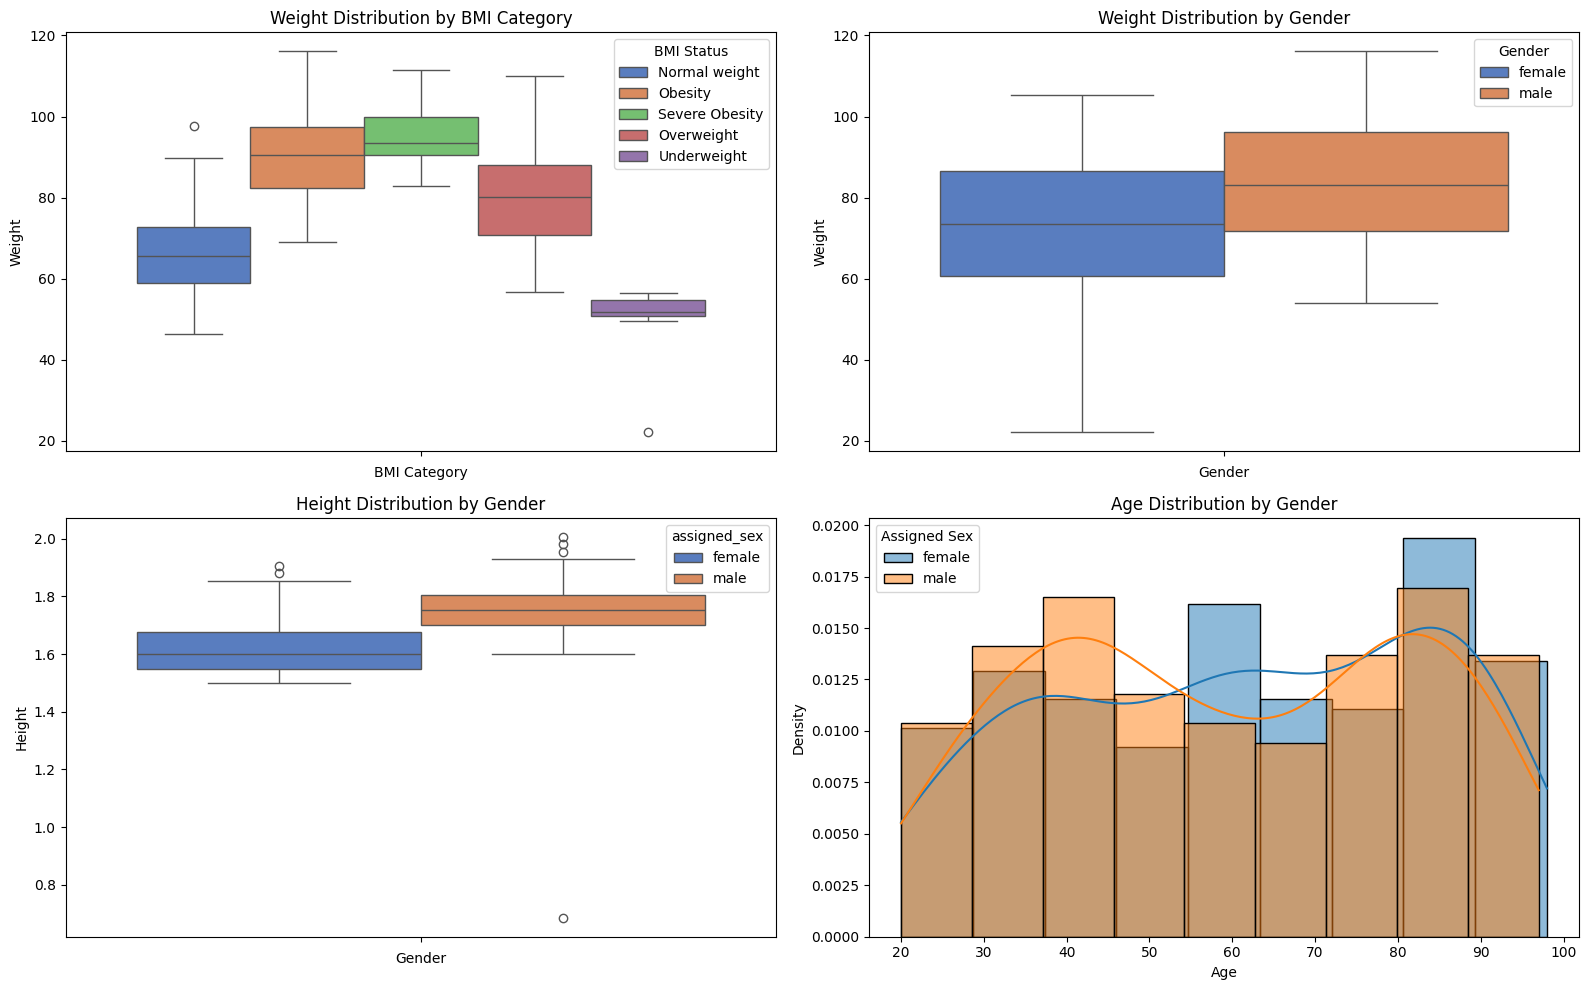

In [ ]:
plt.figure(figsize=(16, 10))

# Box Plot of Weight Distribution by BMI Category
plt.subplot(2, 2, 1)
sns.boxplot(data=patients, y='weight', hue='bmi_status', palette='muted')
plt.title('Weight Distribution by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Weight')
plt.legend(title='BMI Status')

# Weight Distribution by Gender
plt.subplot(2, 2, 2)
sns.boxplot(data=patients, y='weight', hue='assigned_sex', palette='muted')
plt.title('Weight Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.legend(title='Gender')

# Height Distribution by Assigned Sex
plt.subplot(2, 2, 3)
sns.boxplot(data=patients, y='height', hue='assigned_sex', palette='muted')
plt.title('Height Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Height')

plt.subplot(2, 2, 4)
for i in patients['assigned_sex'].unique():
    sns.histplot(data=patients[patients['assigned_sex'] == i], x="age", kde=True, label=i, alpha=0.5, stat='density')

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Assigned Sex')

plt.tight_layout()
plt.show()


**Weight VS BMI Status**
- Clear Correlation between BMI Category and Weight. The box plot showing a strong relationship between BMI category and weight distribution.
- Weight Increases with BMI Category,As BMI category increases, the median weight also increases.
- There is a general trend of increasing weight with higher BMI categories, there is also significant variability within each category. This indicates that other factors besides BMI may influence weight pected.

**Weight Distribution by Gender**
- The median weight for males is slightly higher than that for females.
- There are a few outliers present in both genders, particularly in the higher weight range.

**Height Distribution by Gender**
- The median height for females is lower than that for males.
- The median height for males is higher, indicating a taller stature on average.
- There are a few outliers present in both genders, suggesting the possibility of extreme height values.

**Age Distribution by Gender**
- The first peak is more prominent for females, indicating a higher concentration of younger females.
- The second peak is more prominent for males, suggesting a higher concentration of older males.

### Categorical VS Categorical

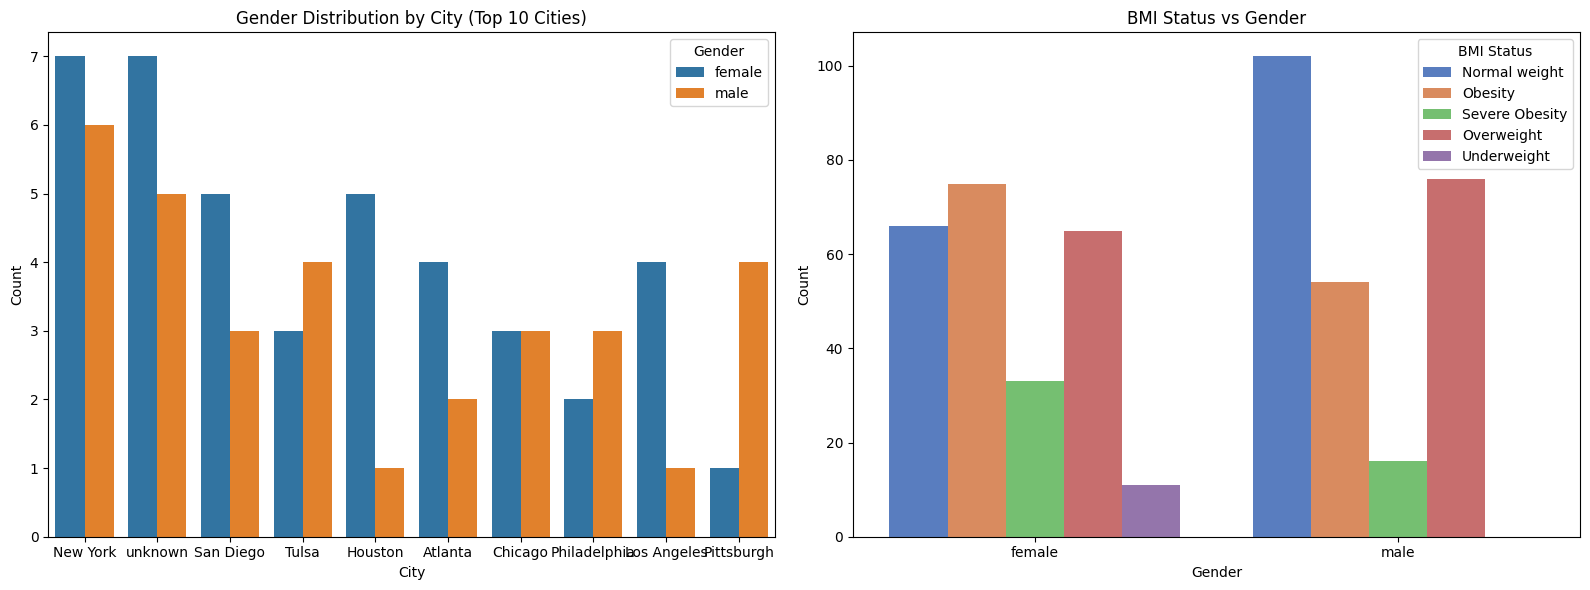

In [ ]:
plt.figure(figsize=(16, 6))

# Gender Distribution by City (Top 10 Cities)
plt.subplot(1, 2, 1)
sns.countplot(data=patients, x='city', hue='assigned_sex', order=patients['city'].value_counts().index[:10])
plt.title('Gender Distribution by City (Top 10 Cities)')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Gender')

# Count Plot for BMI Status vs Assigned Sex
plt.subplot(1, 2, 2)
sns.countplot(data=patients, x='assigned_sex', hue='bmi_status', palette='muted')
plt.title('BMI Status vs Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='BMI Status')

plt.tight_layout()
plt.show()


#### Insights from the Gender Distribution by City (Top 10 Cities)

**Gender Distribution by City**
- **New York:** The highest number of females is found in New York City.
- **Unknown:** The second-highest number of females is in the "unknown" category, possibly indicating missing or inaccurate gender data,need of further analysis.
- **Houston:** The highest number of males is found in Houston.
- **Balanced Cities:** Philadelphia and Pittsburgh have a relatively equal number of females and males.

**BMI Status VS Gender**
- Males have higher rates of obesity, severe obesity, and overweight compared to females.
- Females have a higher rate of underweight compared to males.

## Multi-Veriate Analysis

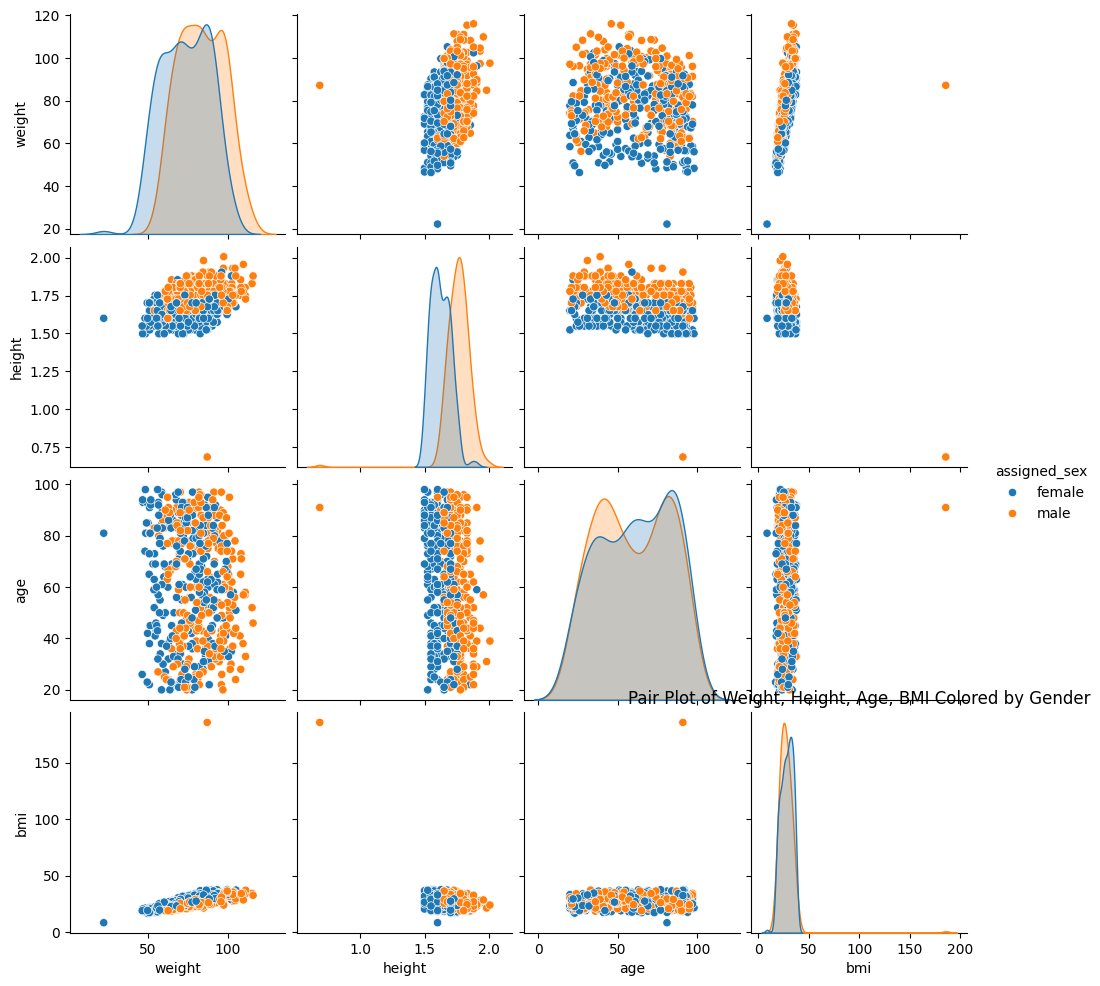

In [ ]:
# Pair Plot
sns.pairplot(patients, hue='assigned_sex', vars=['weight', 'height', 'age', 'bmi'])
plt.title('Pair Plot of Weight, Height, Age, BMI Colored by Gender')
plt.show()

#### Insight's Of Multi-Veriate Analysis

**Relationships between Patient's weight,Height,Age,BMI Using Pair Plot**

**Weight and Height:**
- There appears to be a positive correlation between weight and height, especially when visualized by gender. Taller individuals tend to weigh more.
- The distributions of weight and height for males and females overlap to some extent, but there are noticeable differences. Males tend to be taller and heavier than females.

**Height and Age:**
- There seems to be a slight positive correlation between height and age, suggesting that taller individuals might be slightly older on average. However, this relationship is not very strong.

**BMI:**
- The distributions of BMI for males and females also overlap, but there are some differences. Males tend to have slightly higher BMIs than females.

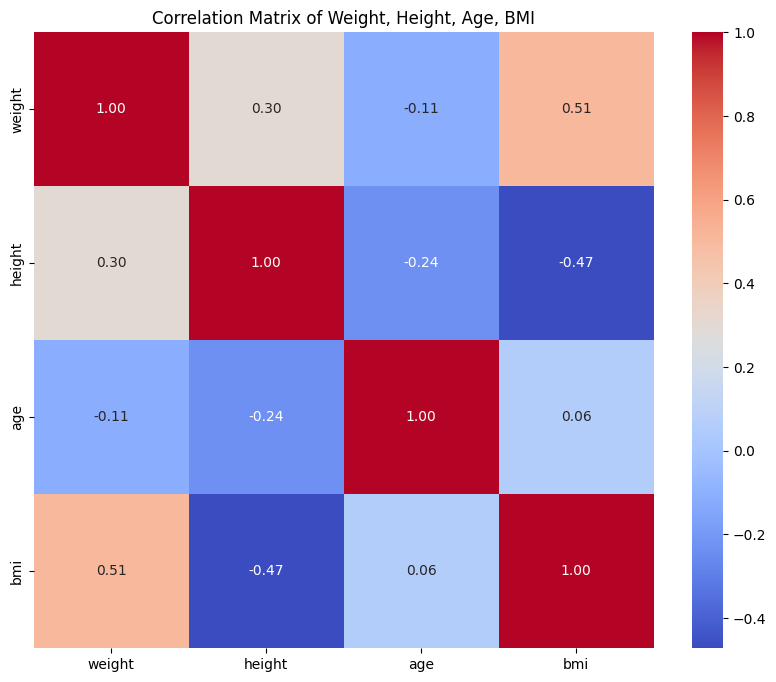

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = patients[['weight', 'height', 'age', 'bmi']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weight, Height, Age, BMI')
plt.show()

#### Insight's Of Correlations Matrix

**Weight and Height:**
- There is a strong positive correlation between weight and height of 0.30, indicating that taller individuals tend to weigh more.

**Weight and BMI:**
- There is a very strong positive correlation between weight and BMI of 0.51, which is expected as BMI is calculated using weight and height.

**Height and Age:**
- There is a weak negative correlation between height and age of -0.11, suggesting that slightly taller individuals might be slightly younger on average. However, this relationship is not very strong.

**BMI and Age:**
- There is a weak positive correlation between BMI and age of 0.06, indicating that older individuals might have slightly higher BMIs on average.


## **DATA SUMMARY:**
This dataset includes information on 500 patients, out of which 350 participated in a clinical trial. None of these patients were previously using Novodra (a well-known injectable insulin) or Auralin (the oral insulin being tested) as their primary insulin source. All patients had elevated HbA1c levels.

Initially, all 350 patients were treated with Novodra to establish baseline HbA1c levels and insulin doses. After 4 weeks, which is insufficient to fully observe the changes in HbA1c due to switching to Auralin or continuing with Novodra, the patients were divided as follows:

* 175 patients transitioned to Auralin for 24 weeks.
* 175 patients continued using Novodra for 24 weeks. Data on patients experiencing adverse effects is also recorded.

**Additional details:** Insulin resistance varies among individuals, making it necessary to record both the initial and final median daily doses to calculate the change in dosage. Testing drugs and medical products on the people they are intended to benefit is crucial. Clinical trials must include participants of different ages, races, sexes, and ethnic groups. This diversity is reflected in the patient dataset.

### **Table -> patients:**

* **patient_id:** A unique identifier for each patient in the pharmaceutical company’s Master Patient Index, which is producing Auralin.

* **assigned_sex:** The sex assigned to each patient at birth (male or female).

* **given_name:** The first name of each patient.
* **surname:** The last name of each patient.
* **address:** The primary address for each patient.
* **city:** The city associated with the patient's primary address.
* **state:** The state associated with the patient's primary address.
* **zip_code:**The postal code associated with the patient's primary address.
* **country:** The country associated with the patient's primary address (all patients are located in the United States for this clinical trial).
* **contact:** The phone number and email information for each patient.
* **birthdate:** The birthdate of each patient (month/day/year). The inclusion criteria for this clinical trial require participants to be 18 years or older, with no upper age limit due to the growing prevalence of diabetes among the elderly.
* **weight:** The weight of each patient in pounds (lbs).
* **height:** The height of each patient in inches (in).
* **bmi:** The Body Mass Index (BMI) of each patient, calculated using their height and weight. BMI = kg/m², where kg is the weight in kilograms and m² is height in meters squared. A BMI of 25.0 or higher is considered overweight, while a healthy range is 18.5 to 24.9. The inclusion criteria for this trial require a BMI between 16 and 38.

### **Table -> treatments and treatment_cut:**
* **given_name:** The first name of each patient in the Master Patient Index who participated in the clinical trial.
* **surname:** The last name of each patient in the Master Patient Index who participated in the clinical trial.
* **auralin:** The baseline median daily dose of insulin one week before switching to Auralin (number before the dash) and the ending median daily dose after 24 weeks of treatment (number after the dash). Both are measured in units (u), which is the standard international unit for insulin measurement.
* **novodra:** Similar to Auralin, but for patients who continued treatment with Novodra.
* **hba1c_start:** The patient’s HbA1c level at the beginning of the first week of treatment. HbA1c measures average blood sugar levels over the past three months and is a key indicator of diabetes control. It is recommended to be measured 2 to 4 times per year, with results expressed as a percentage.
* **hba1c_end:** The patient’s HbA1c level at the end of the final week of treatment.
* **hba1c_change:** The change in the patient’s HbA1c level from the start to the end of treatment, calculated as hba1c_start - hba1c_end. For Auralin to be considered effective, it must be "noninferior" to Novodra, the current insulin standard. Noninferiority is statistically defined as the upper limit of the 95% confidence interval for the difference between the mean HbA1c changes of Novodra and Auralin (Novodra minus Auralin) being less than 0.4%.

###**Table -> adverse_reactions:**
* **given_name:** The first name of each patient in the Master Patient Index who participated in the clinical trial and reported an adverse reaction.
* **surname:** The last name of each patient in the Master Patient Index who participated in the clinical trial and reported an adverse reaction.
* **adverse_reaction:** The adverse reaction reported by the patient. This includes reactions experienced by patients treated with both Auralin and Novodra.

# Treatments Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew

In [ ]:
treatment = pd.read_csv("/content/treatments_cleaned.csv")
treatment.head()

given_name     surname          full_name  start_dose  end_dose  \
0   veronika    jindrova  veronika jindrova        41.0      48.0   
1     elliot  richardson  elliot richardson        40.0      45.0   
2   yukitaka    takenaka  yukitaka takenaka        39.0      36.0   
3       skye  gormanston    skye gormanston        33.0      36.0   
4     alissa      montez      alissa montez        33.0      29.0   

   hba1c_start  hba1c_end  hba1c_change drug_type  
0         7.63       7.20          0.43   Auralin  
1         7.56       7.09          0.47   Novodra  
2         7.68       7.25          0.43   Novodra  
3         7.97       7.62          0.35   Auralin  
4         7.78       7.46          0.32   Novodra

In [ ]:
treatment_cut = pd.read_csv("/content/treatments_cut_cleaned.csv")
treatments.head()

given_name    surname           full_name  start_dose  end_dose  \
0      jozka  resanovic     jozka resanovic        22.0      30.0   
1  inunnguaq   heilmann  inunnguaq heilmann        57.0      67.0   
2      alwin   svensson      alwin svensson        36.0      39.0   
3        the      luong           the luong        61.0      64.0   
4     amanda    ribeiro      amanda ribeiro        36.0      44.0   

   hba1c_start  hba1c_end  hba1c_change drug_type  
0         7.56       7.22          0.34   Auralin  
1         7.85       7.45          0.40   Auralin  
2         7.78       7.34          0.44   Auralin  
3         7.64       7.22          0.42   Novodra  
4         7.85       7.47          0.38   Auralin

In [ ]:
treatments = pd.concat([treatment, treatment_cut], ignore_index=True)
treatments.to_csv("treatments_combined.csv", index=False)

In [ ]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    349 non-null    object 
 1   surname       349 non-null    object 
 2   full_name     349 non-null    object 
 3   start_dose    349 non-null    float64
 4   end_dose      349 non-null    float64
 5   hba1c_start   349 non-null    float64
 6   hba1c_end     349 non-null    float64
 7   hba1c_change  349 non-null    float64
 8   drug_type     349 non-null    object 
dtypes: float64(5), object(4)
memory usage: 24.7+ KB


In [ ]:
treatments.columns

Index(['given_name', 'surname', 'full_name', 'start_dose', 'end_dose',
       'hba1c_start', 'hba1c_end', 'hba1c_change', 'drug_type'],
      dtype='object')

In [ ]:
treatments.isna().sum()

given_name      0
surname         0
full_name       0
start_dose      0
end_dose        0
hba1c_start     0
hba1c_end       0
hba1c_change    0
drug_type       0
dtype: int64

In [ ]:
treatments.shape

(349, 9)

In [ ]:
treatments[['start_dose', 'end_dose','hba1c_start', 'hba1c_end', 'hba1c_change']].describe()

start_dose    end_dose  hba1c_start   hba1c_end  hba1c_change
count  349.000000  349.000000   349.000000  349.000000    349.000000
mean    39.100287   43.065903     7.957077    7.561117      0.395960
std      9.307562   10.532310     0.545938    0.545878      0.059054
min     19.000000   21.000000     7.500000    7.010000      0.200000
25%     32.000000   36.000000     7.650000    7.270000      0.350000
50%     39.000000   42.000000     7.790000    7.400000      0.390000
75%     45.000000   50.000000     7.950000    7.560000      0.440000
max     63.000000   75.000000     9.950000    9.580000      0.540000

#### **Insights from the Treatments Dataset**

**Overview of the Dataset**
- The dataset contains **349 entries** and **9 columns**, providing comprehensive information on patient treatment details.
- There are no missing values in any of the columns, indicating a complete dataset for analysis.

**Start Dose**
  - The average starting dose is approximately **39.10** units, with a range from **19 to 63** units.
  - The **standard deviation** of **9.30** indicates variability in the initial dosages prescribed.

**End Dose**
  - The average end dose is around **43.06** units, with a minimum of **21** and a maximum of **75** units.
  - The **standard deviation** of **10.53** shows variability in the dosages administered after treatment.

**Starting HbA1c Levels**:
  - The mean starting HbA1c level is about **7.95**, with values ranging from **7.50 to 9.95**.
  - This indicates that patients generally start with elevated blood sugar levels.

**Ending HbA1c Levels**
  - The average HbA1c level after treatment is approximately **7.95**, showing a reduction in blood sugar levels.
  - The range of ending HbA1c values is from **7.01 to 9.58**.

**HbA1c Change**
  - The average change in HbA1c levels is **0.39**, indicating an overall reduction in blood sugar levels due to treatment.
  - The minimum change recorded is **0.20**, while the maximum change is **0.54**.

**Numerical Columns**

- **start_dose**: The initial dosage of medication administered.
- **end_dose**: The final dosage of medication after treatment.
- **hba1c_start**: The starting HbA1c level before treatment.
- **hba1c_end**: The HbA1c level after treatment.
- **hba1c_change**: The change in HbA1c level resulting from the treatment.

**Categorical Columns**

- **drug_type**: The type of drug used in the treatment.

## Uni-Veriate Analysis

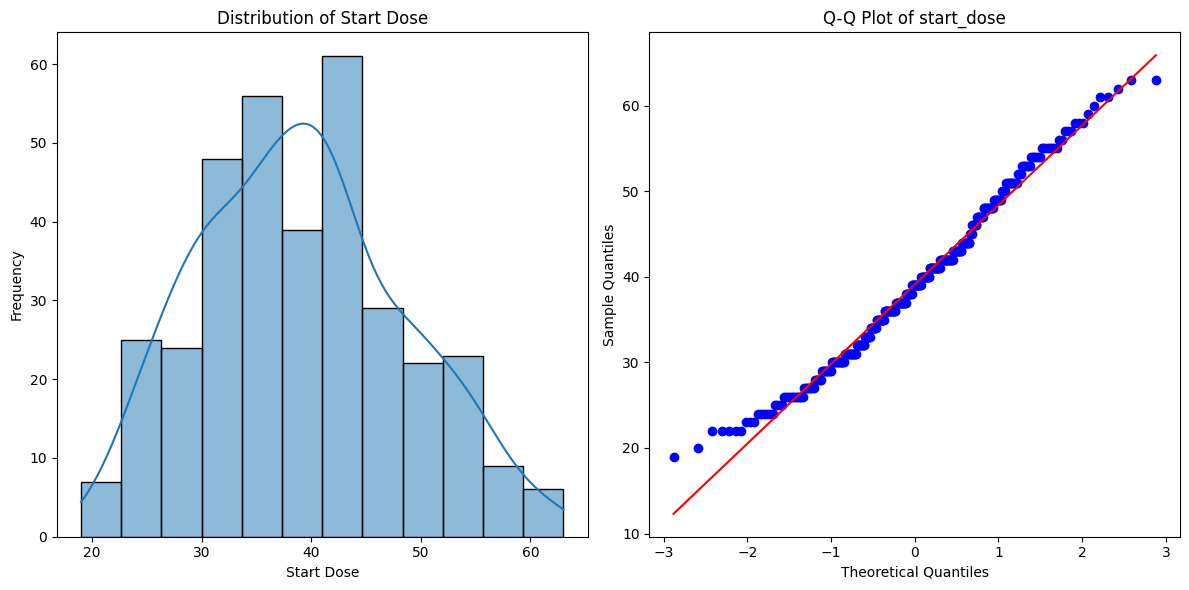

In [ ]:
plt.figure(figsize=(12, 6))

# Distribution of Start Dose by histogram
plt.subplot(1,2,1)
sns.histplot(data = treatments, x = "start_dose",kde = True)
plt.title("Distribution of Start Dose")
plt.xlabel("Start Dose")
plt.ylabel("Frequency")

# QQ plot of Start Dose Distribution
plt.subplot(1,2,2)
stats.probplot(treatments['start_dose'], dist="norm", plot=plt)
plt.title('Q-Q Plot of start_dose')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

#### Insights of end_dose

**Distribution of Start Dose**

- **Normality:** The histogram suggests a roughly normal distribution of `start_dose` with a slight right skew. The peak is around 40, indicating that most values are concentrated around this point.
- **Range:** The values range from approximately 20 to 60, with a majority of data points falling between 30 and 50.

**Q-Q Plot of Start Dose**

- **Normality:** The Q-Q plot confirms the near-normal distribution of `start_dose`. The points follow a straight line quite closely, indicating that the observed quantiles are similar to those expected from a normal distribution.
- **Slight Deviation:** There's a slight deviation from the line in the upper tail, suggesting a slightly heavier tail than a perfectly normal distribution. However, this deviation is not severe.

**Overall**
- The `start_dose` data is approximately normally distributed, with a slight right skew and heavier tails than a perfectly normal distribution.



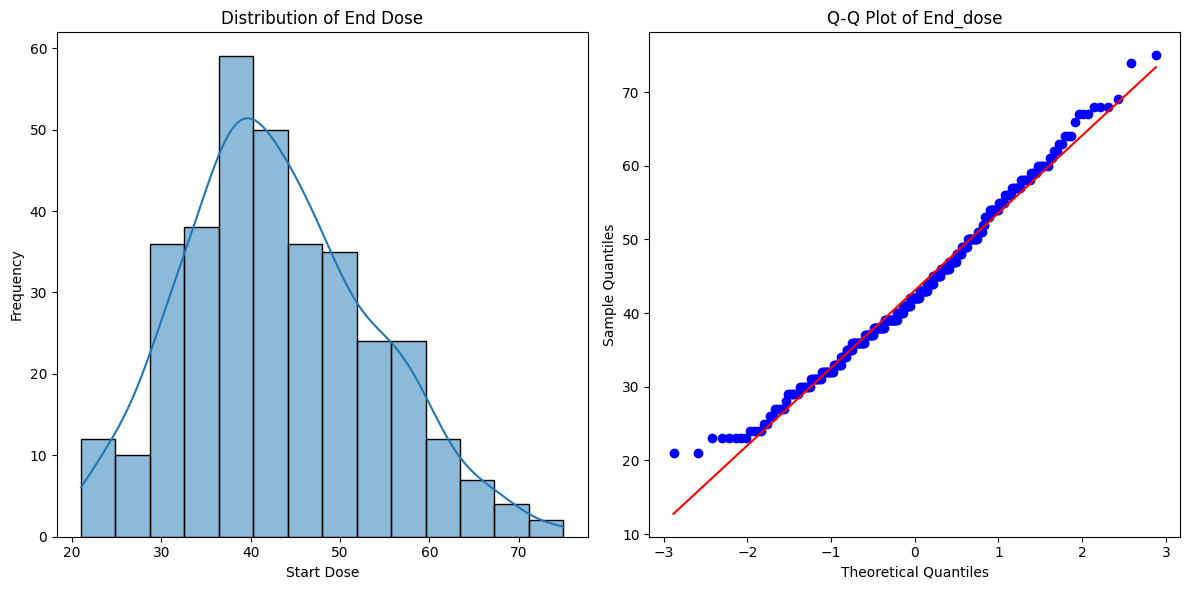

In [ ]:
plt.figure(figsize=(12, 6))

# Distribution of End Dose by histogram
plt.subplot(1,2,1)
sns.histplot(data = treatments, x = "end_dose",kde = True)
plt.title("Distribution of End Dose")
plt.xlabel("Start Dose")
plt.ylabel("Frequency")

# QQ plot ofEnd Dose Distribution
plt.subplot(1,2,2)
stats.probplot(treatments['end_dose'], dist="norm", plot=plt)
plt.title('Q-Q Plot of End_dose')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

#### Insights of end_dose

**Distribution of End Dose**

- **Normality:** The histogram suggests a roughly normal distribution of `end_dose` with a slight left skew. The peak is around 45, indicating that most values are concentrated around this point.
- **Range:** The values range from approximately 20 to 70, with a majority of data points falling between 30 and 50.

**Q-Q Plot of End Dose**

- **Normality:** The Q-Q plot confirms the near-normal distribution of `end_dose`. The points follow a straight line quite closely, indicating that the observed quantiles are similar to those expected from a normal distribution.
- **Slight Deviation:** There's a slight deviation from the line in the lower tail, suggesting a slightly heavier tail than a perfectly normal distribution. However, this deviation is not severe.

**Overall**

- The `end_dose` data is approximately normally distributed, with a slight left skew and heavier tails than a perfectly normal distribution.

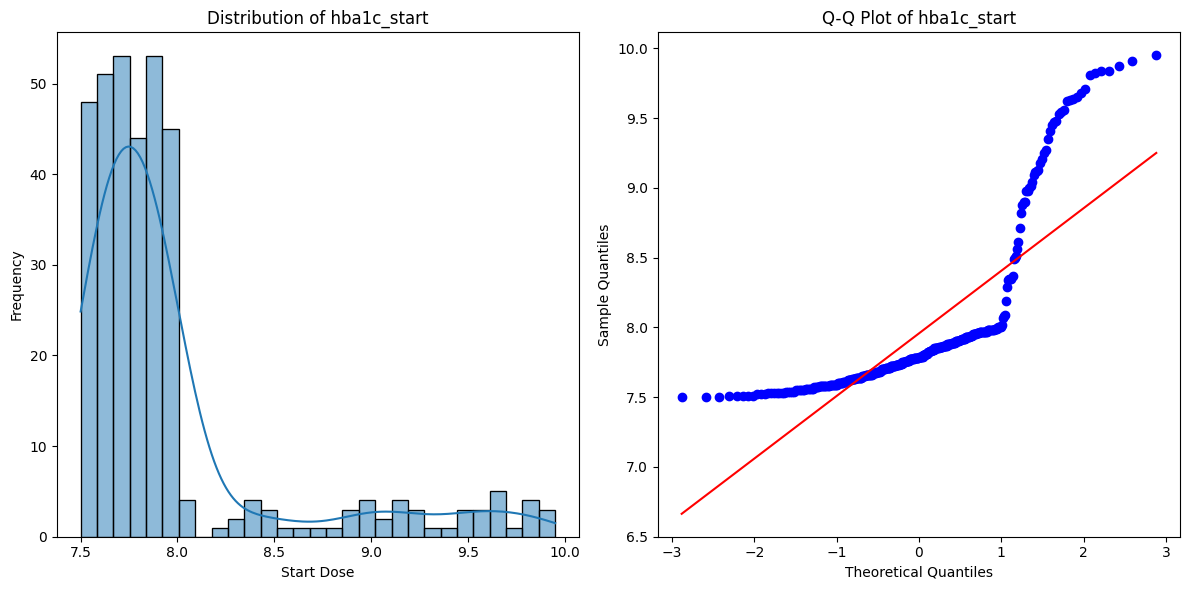

In [ ]:
plt.figure(figsize=(12, 6))

# Distribution of hba1c_start by histogram
plt.subplot(1,2,1)
sns.histplot(data = treatments, x = "hba1c_start",kde = True)
plt.title("Distribution of hba1c_start")
plt.xlabel("Start Dose")
plt.ylabel("Frequency")

# QQ plot of hba1c_start Distribution
plt.subplot(1,2,2)
stats.probplot(treatments['hba1c_start'], dist="norm", plot=plt)
plt.title('Q-Q Plot of hba1c_start')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

#### Insights of hba1c_start

**Distribution of hbalc_start**

- **Skewness:** The histogram indicates a right-skewed distribution of `hbalc_start`. The majority of values are clustered towards the lower end of the range, with a longer tail extending towards higher values.
- **Range:** The values range from approximately 7.0 to 10.0, with a peak around 7.5.

**Q-Q Plot of hbalc_start**

- **Normality:** The Q-Q plot confirms the non-normal distribution of `hbalc_start`. The points deviate significantly from the straight line, particularly in the upper tail.
- **Right-Skewness:** The upward curve in the upper tail indicates right-skewness, consistent with the histogram.

**Overall Conclusions**

- The `hbalc_start` data is not normally distributed, as evidenced by the right-skewed histogram and the deviation from the straight line in the Q-Q plot.


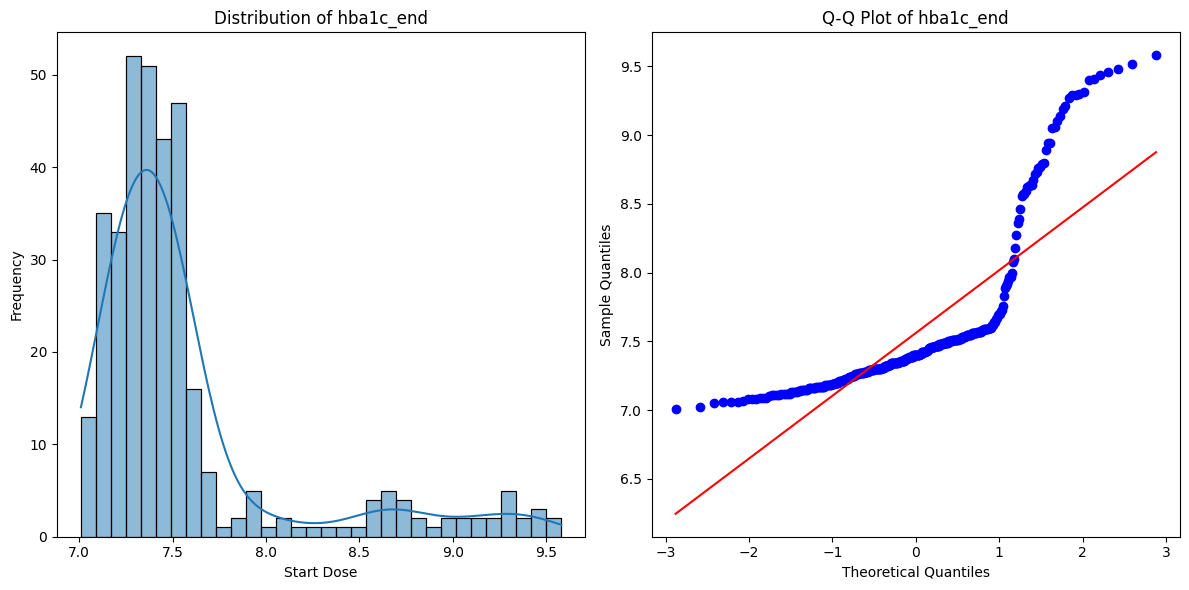

In [ ]:
plt.figure(figsize=(12, 6))

# Distribution of hba1c_end by histogram
plt.subplot(1,2,1)
sns.histplot(data = treatments, x = "hba1c_end",kde = True)
plt.title("Distribution of hba1c_end")
plt.xlabel("Start Dose")
plt.ylabel("Frequency")

# QQ plot of hba1c_end Distribution
plt.subplot(1,2,2)
stats.probplot(treatments['hba1c_end'], dist="norm", plot=plt)
plt.title('Q-Q Plot of hba1c_end')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

#### Insights of hblac end

**Distribution of hbalc_end**

- **Skewness:** The histogram indicates a right-skewed distribution of `hbalc_end`. The majority of values are clustered towards the lower end of the range, with a longer tail extending towards higher values.
- **Range:** The values range from approximately 7.0 to 9.5, with a peak around 7.5.

**Q-Q Plot of hbalc_end**

- **Normality:** The Q-Q plot confirms the non-normal distribution of `hbalc_end`. The points deviate significantly from the straight line, particularly in the upper tail.
- **Right-Skewness:** The upward curve in the upper tail indicates right-skewness, consistent with the histogram.

**Overall**

- The `hbalc_end` data is not normally distributed, as evidenced by the right-skewed histogram and the deviation from the straight line in the Q-Q plot.

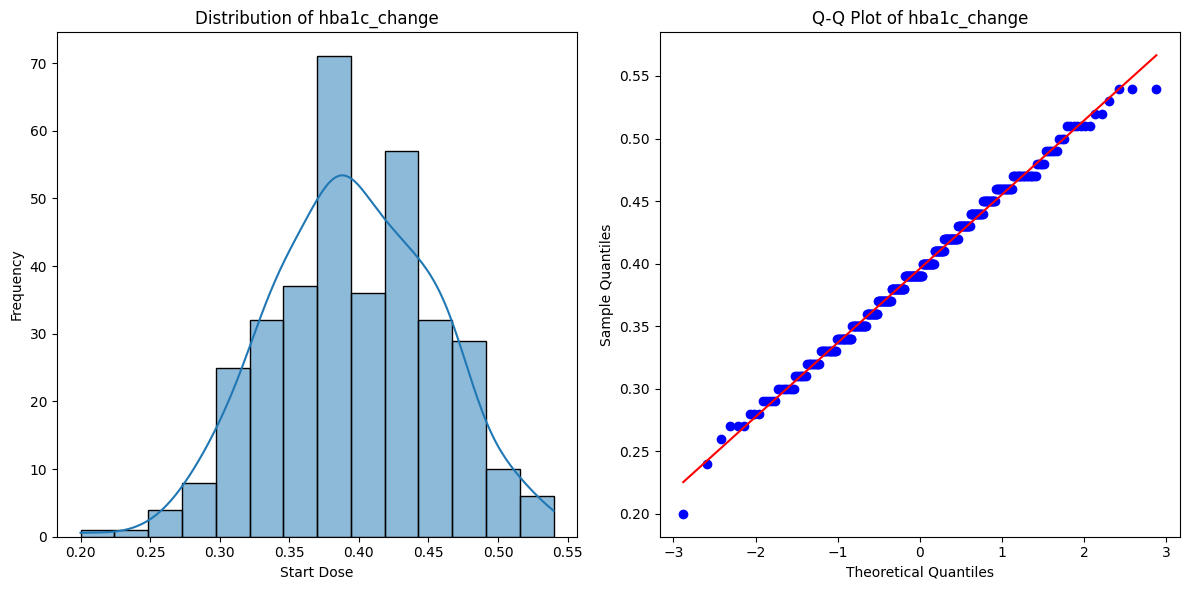

In [ ]:
plt.figure(figsize=(12, 6))

# Distribution of hba1c_change by histogram
plt.subplot(1,2,1)
sns.histplot(data = treatments, x = "hba1c_change",kde = True)
plt.title("Distribution of hba1c_change")
plt.xlabel("Start Dose")
plt.ylabel("Frequency")

# QQ plot of hba1c_change Distribution
plt.subplot(1,2,2)
stats.probplot(treatments['hba1c_change'], dist="norm", plot=plt)
plt.title('Q-Q Plot of hba1c_change')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

## Insights Of hba1c_change

**Distribution of hbalc_change**

- **Normality:** The histogram suggests a roughly normal distribution of `hbalc_change` with a slight left skew. The peak is around 0.35, indicating that most values are concentrated around this point.
- **Range:** The values range from approximately 0.20 to 0.55, with a majority of data points falling between 0.30 and 0.45.

**Q-Q Plot of hbalc_change**

- **Normality:** The Q-Q plot confirms the near-normal distribution of `hbalc_change`. The points follow a straight line quite closely, indicating that the observed quantiles are similar to those expected from a normal distribution.
- **Slight Deviation:** There's a slight deviation from the line in the upper tail, suggesting a slightly heavier tail than a perfectly normal distribution. However, this deviation is not severe.

**Overall**
- **Approximately Normal Distribution:** The `hbalc_change` data is approximately normally distributed, with a slight left skew and heavier tails than a perfectly normal distribution.

In [ ]:
treatments.drug_type.value_counts()

drug_type
Novodra    175
Auralin    174
Name: count, dtype: int64

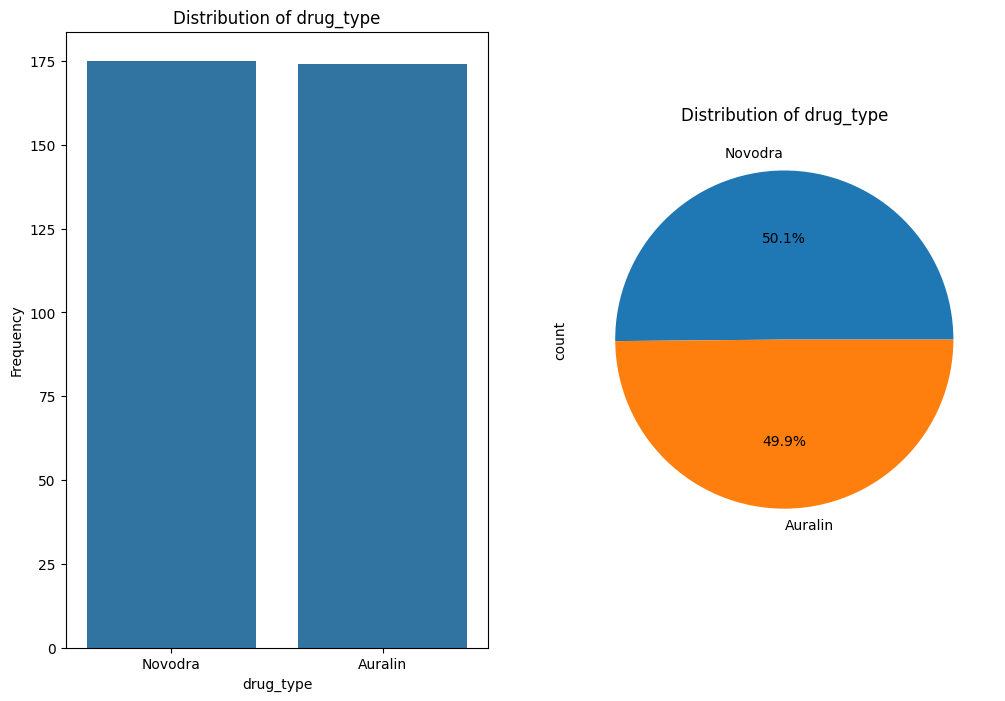

In [ ]:
plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
sns.barplot(x = treatments.drug_type.value_counts().index , y = treatments.drug_type.value_counts().values)
plt.xlabel("drug_type")
plt.ylabel("Frequency")
plt.title("Distribution of drug_type")

plt.subplot(1,2,2)
treatments["drug_type"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.title('Distribution of drug_type')
plt.show()

#### Insights of Drug Type

**Distribution of Drug Type**

- **Dominance of Novodra:** The bar chart shows that Novodra is the more prevalent drug type, with a slightly higher frequency compared to Auralin.
- **Frequency:** The exact frequency of each drug type can be determined from the y-axis of the bar chart.

**Pie Chart**

- **Percentage Distribution:** The pie chart provides the percentage breakdown of drug types. Novodra accounts 175 records for 50.1% of the total, while Auralin accounts for 174 records 49.9% .
- **Visual Representation:** The pie chart offers a clear visual representation of the proportions of each drug type.

**Overall**

- **Novodra is the Majority Drug Type:** The data indicates that Novodra is the more commonly prescribed or used drug type in the given dataset.
- **Proportions:** The pie chart provides the exact proportions of each drug type, allowing for easy comparison and understanding of their relative prevalence.

## Bi-Veriate Analysis

### Numerical VS Numerical

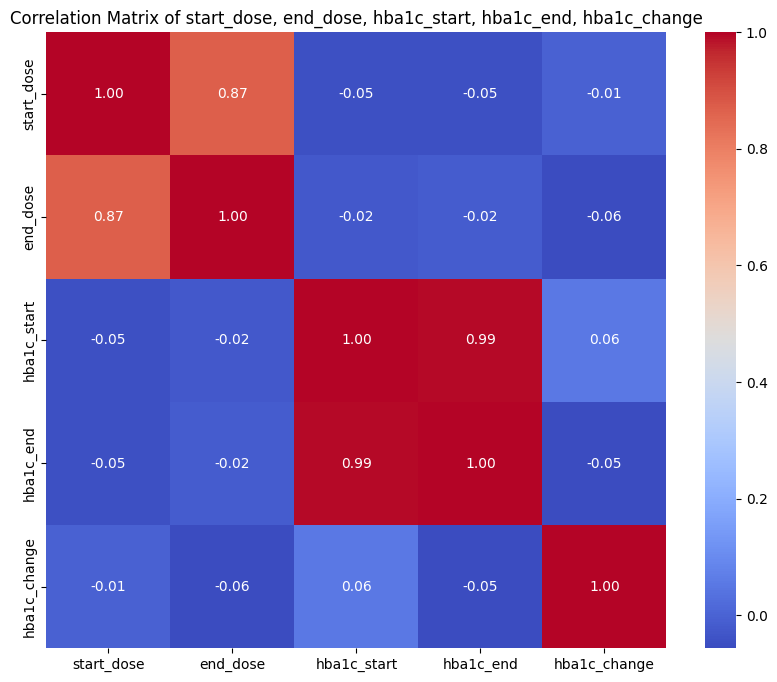

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = treatments[['start_dose', 'end_dose',
       'hba1c_start', 'hba1c_end', 'hba1c_change']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of start_dose, end_dose, hba1c_start, hba1c_end, hba1c_change')
plt.show()

#### Insights from the Correlation Matrix

- **Strong Positive Correlation Between Start Dose and End Dose:**
  - The highest correlation is observed between `start_dose` and `end_dose`, indicating a strong positive relationship.
  - This suggests that patients who start with a higher dose are more likely to end up with a higher dose.
- **High Correlation Between hbalc_start and hbalc_end:**
  - There's a very strong positive correlation between `hbalc_start` and `hbalc_end`, suggesting that patients with higher initial hbalc levels are more likely to have higher final hbalc levels.
- **Weak Correlations with hbalc_change:** -    
    - `hbalc_change` has weak or negligible correlations with the other variables, indicating that changes in hbalc levels are not strongly influenced by the starting or ending doses or the initial hbalc levels.
- **Correlation Coefficients:**
    - The numerical values in the matrix represent the correlation coefficients, ranging from -1 to 1. A value of 1 indicates a perfect positive correlation, while -1 indicates a perfect negative correlation.



### Numerical Vs Categorical

In [ ]:
drug_statistics = treatments.groupby('drug_type').agg({'hba1c_start': ['mean', 'median', 'std'],
    'hba1c_end': ['mean', 'median', 'std'],'hba1c_change': ['mean', 'median', 'std'],
    'start_dose': ['mean', 'median', 'std'],'end_dose': ['mean', 'median', 'std']})
drug_statistics

hba1c_start                  hba1c_end                   \
                 mean median       std      mean median       std   
drug_type                                                           
Auralin      7.960632  7.775  0.567873  7.573678   7.39  0.566115   
Novodra      7.953543  7.800  0.524827  7.548629   7.42  0.526315   

          hba1c_change                  start_dose                   \
                  mean median       std       mean median       std   
drug_type                                                             
Auralin       0.386954   0.39  0.058925   39.08046   38.0  9.778729   
Novodra       0.404914   0.41  0.057972   39.12000   39.0  8.842322   

            end_dose                   
                mean median       std  
drug_type                              
Auralin    47.413793   46.0  9.974014  
Novodra    38.742857   39.0  9.233070

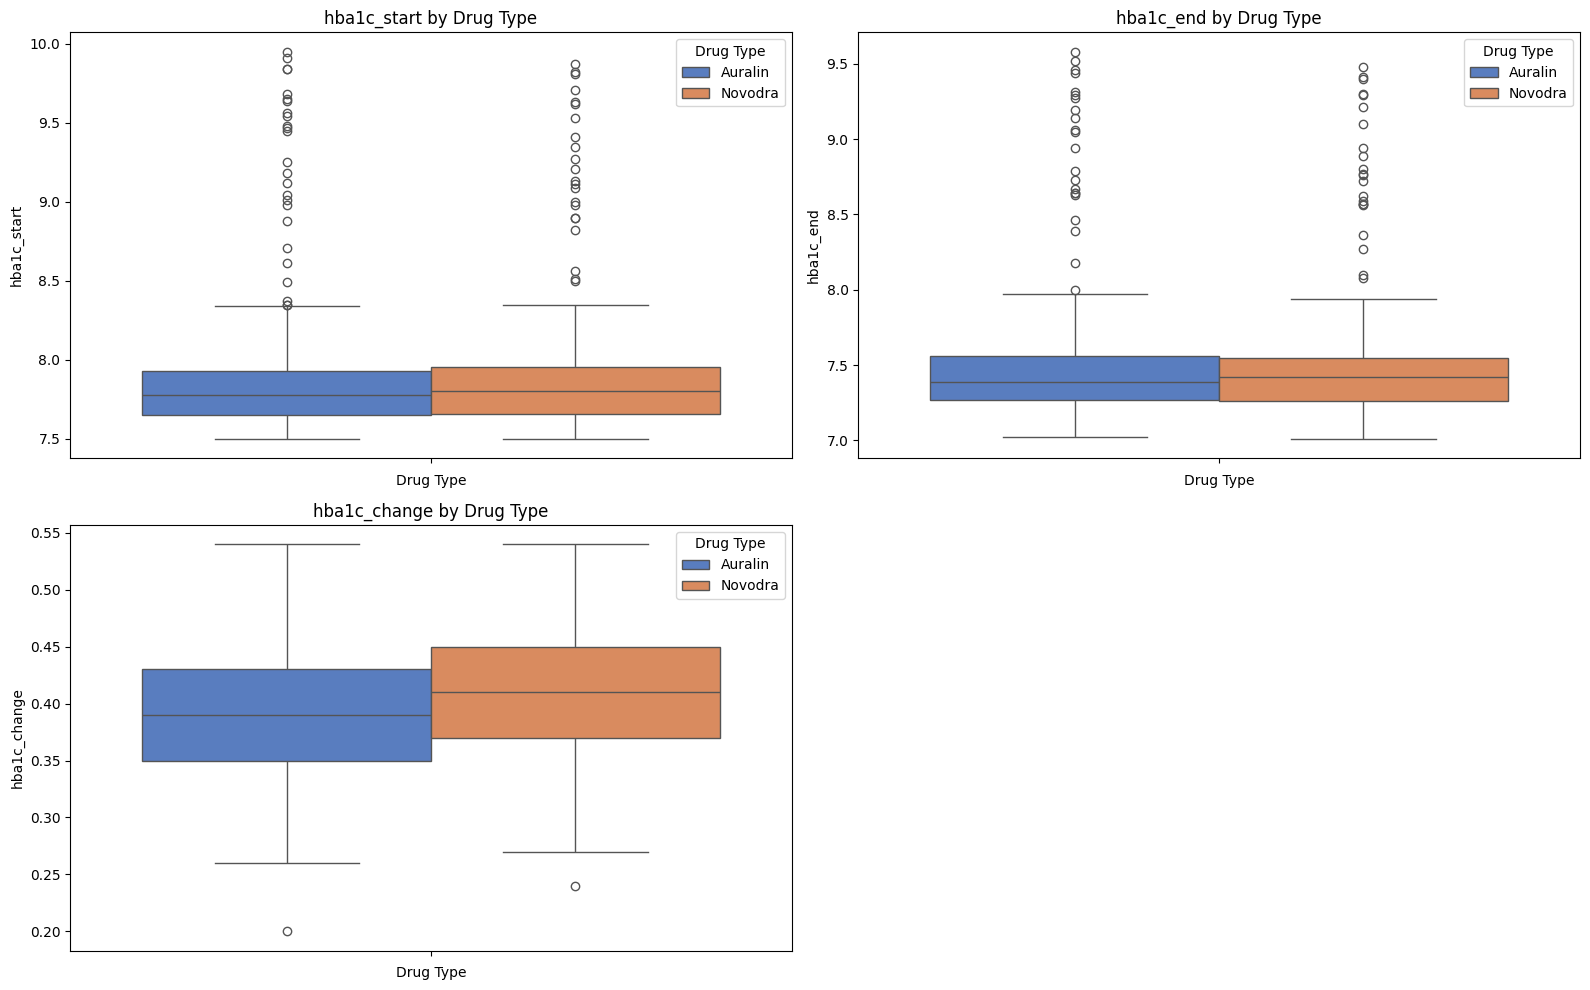

In [ ]:
plt.figure(figsize=(16, 10))

# hba1c_start by Drug Type
plt.subplot(2, 2, 1)
sns.boxplot(data=treatments, y='hba1c_start', hue='drug_type', palette='muted')
plt.title('hba1c_start by Drug Type')
plt.xlabel('Drug Type')
plt.ylabel('hba1c_start')
plt.legend(title='Drug Type')

# hba1c_end by Drug Type
plt.subplot(2, 2, 2)
sns.boxplot(data=treatments, y='hba1c_end', hue='drug_type', palette='muted')
plt.title('hba1c_end by Drug Type')
plt.xlabel('Drug Type')
plt.ylabel('hba1c_end')
plt.legend(title='Drug Type')

# hba1c_change by Drug Type
plt.subplot(2, 2, 3)
sns.boxplot(data=treatments, y='hba1c_change', hue='drug_type', palette='muted')
plt.title('hba1c_change by Drug Type')
plt.xlabel('Drug Type')
plt.ylabel('hba1c_change')
plt.legend(title='Drug Type')

plt.tight_layout()
plt.show()


#### Insights from Box Plot

**hbalc_start by Drug Type**

- **Median Comparison:** The median hbalc_start for Auralin is slightly higher than that for Novodra.
- **Distribution:** The distribution of hbalc_start values is similar for both drug types, with overlapping quartiles and whiskers.
- **Outliers:** There are a few outliers present in both groups, particularly in the higher hbalc_start range.

**hbalc_end by Drug Type**

- **Median Comparison:** The median hbalc_end for Auralin is slightly lower than that for Novodra.
- **Distribution:** The distribution of hbalc_end values is similar for both drug types, with overlapping quartiles and whiskers.
- **Outliers:** There are a few outliers present in both groups, particularly in the higher hbalc_end range.

**hbalc_change by Drug Type**

- **Median Comparison:** The median hbalc_change for Auralin is slightly higher than that for Novodra, suggesting a slightly greater reduction in hbalc levels for Auralin.
- **Distribution:** The distribution of hbalc_change values is similar for both drug types, with overlapping quartiles and whiskers.
- **Outliers:** There are a few outliers present in both groups, particularly in the higher hbalc_change range.

**Overall**

- There are slight differences in the median values for hbalc_start, hbalc_end, and hbalc_change between Auralin and Novodra, the overall distributions are quite similar. This suggests that drug type might not have a significant impact on these variables.

### Categorical VS Categorical

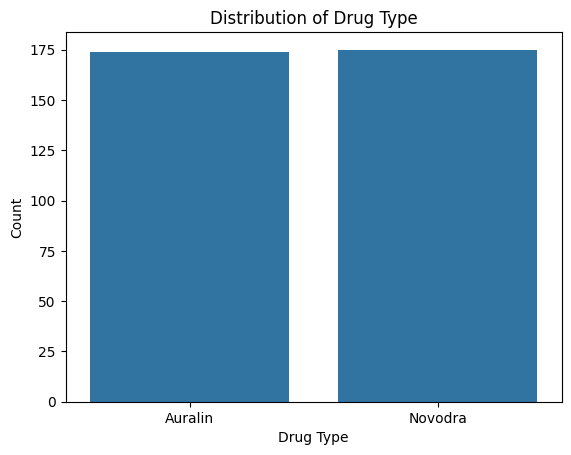

In [ ]:
# Frequency Distribution Of Drug Type
sns.countplot(data = treatments, x='drug_type')
plt.title('Distribution of Drug Type')
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.show()

#### Insights from CountPlot

**Distribution of Drug Type**

- **Dominance of Novodra:** The Count Plot shows that Novodra is the more prevalent drug type, with a slightly higher frequency compared to Auralin.
- **Frequency:** The exact frequency of each drug type are 175 records of Novodra and 174 records of Auralin.

**Overall**

- **Novodra is the Majority Drug Type:** The data indicates that Novodra is the more commonly prescribed or used drug type.
- **Proportions:** The pie chart provides the exact proportions of each drug type, allowing for easy comparison and understanding of their relative prevalence,overall novodra has 50.1% from total along with Auralin has 49.9% of total.

## Multi-Verialte Analysis

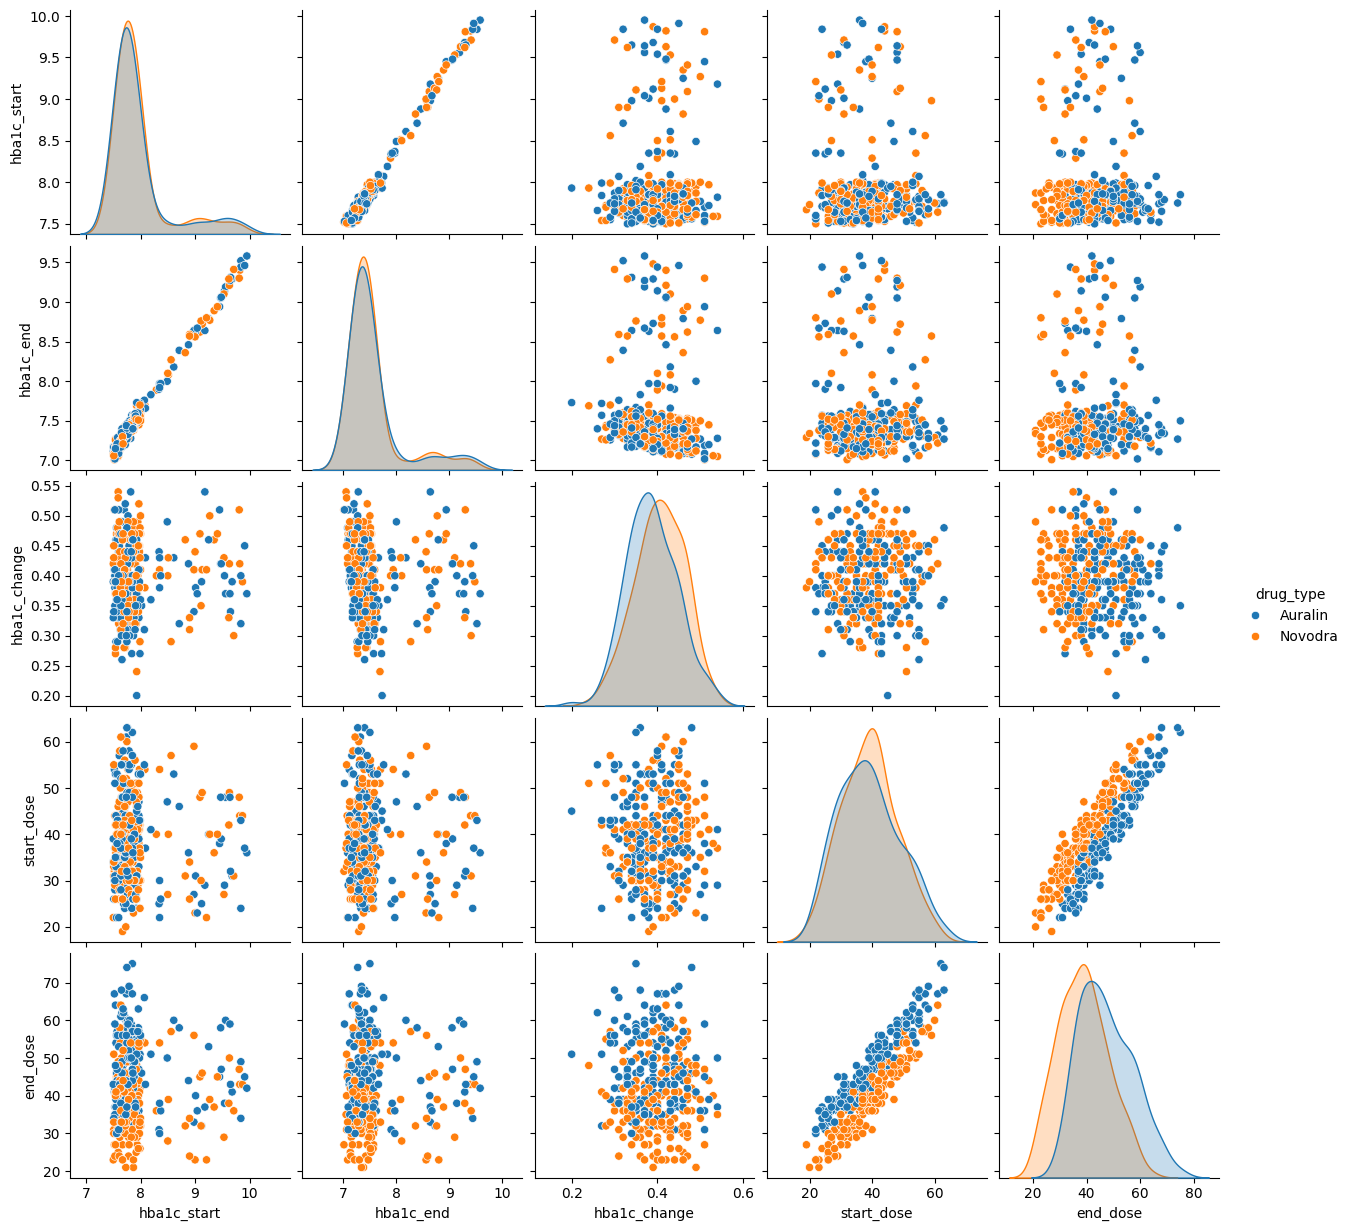

In [ ]:
# Pairwise plots with hue based on drug_type
sns.pairplot(data = treatments, vars=['hba1c_start', 'hba1c_end', 'hba1c_change', 'start_dose', 'end_dose'],  hue='drug_type')
plt.show()

### **Insights from Pair Plot of HbA1c Levels and Drug Type**

- **Strong Positive Correlation**: Higher **HbA1c_start** values are linked to higher **HbA1c_end** values.
- **Negative Correlation**: Patients with higher **HbA1c_start** tend to experience a larger **HbA1c_change** (greater reduction in **HbA1c levels**).
- Patients with higher **HbA1c_end** values tend to see a smaller decrease in **HbA1c levels**.
- Scatter plots show slight variations in correlations between variables based on drug type (Auralin vs. Novodra).
- The distributions of **HbA1c_start**, **HbA1c_end**, and **HbA1c_change** for Auralin and Novodra overlap significantly.
- Individual patient variability in responses is likely more significant than differences between the drug types.
- The relationships among **HbA1c levels** and dosage amounts (**start_dose** and **end_dose**) are consistent across both drug types.
- The scatter plots indicate no clear clustering of data points based on drug type, suggesting similar treatment effects from both Auralin and Novodra.

# Adverse Reaction

In [ ]:
adv = pd.read_csv("/content/adverse_reactions_cleaned.csv")
adv.head()

given_name     surname          full_name           adverse_reaction
0      berta  napolitani   berta napolitani  injection site discomfort
1       lena        baer          lena baer               hypoglycemia
2     joseph         day         joseph day               hypoglycemia
3     flavia  fiorentino  flavia fiorentino                      cough
4    manouck     wubbels    manouck wubbels          throat irritation

In [ ]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   full_name         34 non-null     object
 3   adverse_reaction  34 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [ ]:
adv.isna().sum()

given_name          0
surname             0
full_name           0
adverse_reaction    0
dtype: int64

In [ ]:
adv.shape

(34, 4)

In [ ]:
adv["adverse_reaction"].unique()

array(['injection site discomfort', 'hypoglycemia', 'cough',
       'throat irritation', 'headache', 'nausea'], dtype=object)

### **Insights from Adverse Reactions Data**

**Dataset Overview**:
   - Contains **34 entries** with no missing values across all columns.
   - Columns: `given_name`, `surname`, `full_name`, `adverse_reaction`.

**Unique Adverse Reactions**:
   - There are **6 unique types** of adverse reactions:
     - Injection site discomfort
     - Hypoglycemia
     - Cough
     - Throat irritation
     - Headache
     - Nausea

**Mild Reactions**:
   - **Injection site discomfort** and **throat irritation** are mild, likely linked to the administration of treatment.

**Serious Reactions**:
   - **Hypoglycemia** is a more serious side effect, indicating the need for close blood sugar monitoring during treatment.

**Respiratory Reactions**:
   - **Cough** and **throat irritation** suggest that some patients experience respiratory discomfort.

**General Systemic Symptoms**:
   - **Headache** and **nausea** are general symptoms, possibly related to the body’s response to treatment or glucose level changes.

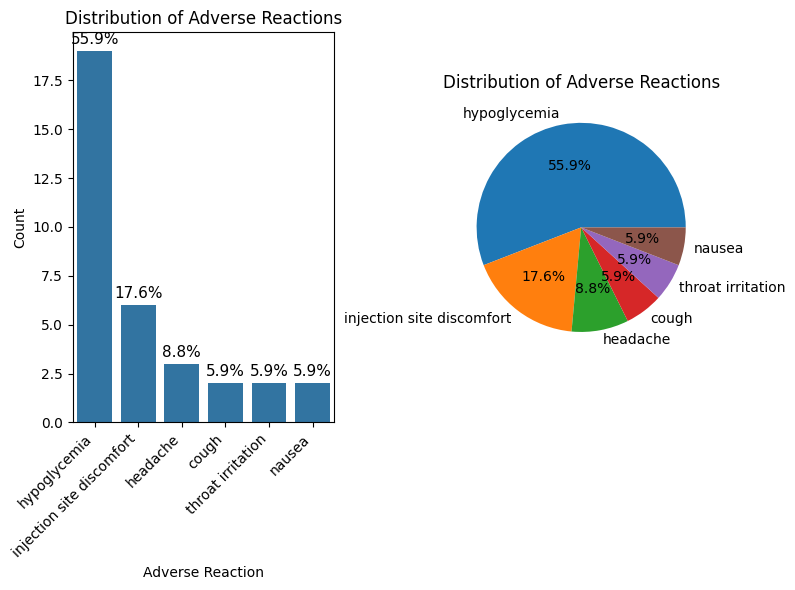

In [ ]:
plt.figure(figsize=(8, 6))

# Distribution of Adverse Reaction by Count Plot
plt.subplot(1, 2, 1)
ax = sns.countplot(data=adv, x='adverse_reaction', order=adv['adverse_reaction'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(adv) * 100:.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Adverse Reactions')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Adverse Reaction')
plt.ylabel('Count')

# Distribution of Adverse Reaction by Pie Chart
plt.subplot(1, 2, 2)
adv['adverse_reaction'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Adverse Reactions")
plt.ylabel('')

plt.tight_layout()
plt.show()


#### Insights from the Distribution of Adverse Reactions Bar Chart

**Overall Observations**

- The bar chart clearly shows that hypoglycemia is the most common adverse reaction, accounting for a significantly higher percentage compared to the others.
- Injection site discomfort, headache, and cough are also relatively common adverse reactions, with percentages ranging from 5.9% to 17.6%.
- Throat irritation and nausea are the least frequent adverse reactions, both occurring in 5.9% of cases.
- Hypoglycemia accounts for 55.9% of all adverse reactions, indicating a significant prevalence.
- The percentages for injection site discomfort, headache, cough, throat irritation, and nausea are as follows: 17.6%, 8.8%, 5.9%, 5.9%, and 5.9% respectively.

# Final Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew

In [ ]:
patients= pd.read_csv("/content/patients_cleaned.csv")
treatments = pd.read_csv("/content/treatments_combined.csv")

In [ ]:
# Clean the 'full_name' columns by making them lowercase and stripping whitespace
patients['full_name'] = patients['full_name'].str.lower().str.strip()
treatments['full_name'] = treatments['full_name'].str.lower().str.strip()

In [ ]:
patients[patients['full_name'].isin(treatments['full_name'])]

patient_id given_name      surname            full_name assigned_sex  \
0             1        Zoe      Wellish          zoe wellish       female   
1             2     Pamela         Hill          pamela hill       female   
3             4       Liem         Phan            liem phan         male   
5             6     Rafael        Costa         rafael costa         male   
6             7       Mary        Adams           mary adams       female   
..          ...        ...          ...                  ...          ...   
489         495     Sirkka    Piirainen     sirkka piirainen       female   
491         497  Alexander       Hueber     alexander hueber         male   
493         499    Mustafa    Lindstrom    mustafa lindstrom         male   
494         500      Ruman      Bisliev        ruman bisliev         male   
496         502    Chidalu  Onyekaozulu  chidalu onyekaozulu       female   

         weight  height   birthdate  age  phone_number  \
0     55.202146  1.6764  1976-07-10   43    9517199170   
1     53.886730  1.6764  1967-04-03   52    2175693204   
3    100.198473  1.7780  1951-07-26   68    7326368246   
5     83.415569  1.7780  1931-08-31   88    3863345237   
6     66.360510  1.6510  1969-11-19   50    7755335933   
..          ...     ...         ...  ...           ...   
489   57.288670  1.7018  1942-01-16   77    5867900975   
491   87.996848  1.8288  1942-09-12   77    2097622320   
493   82.145511  1.8288  1959-04-10   60    2074770579   
494  108.680643  1.7780  1948-03-26   71    9282844492   
496   80.240425  1.7018  1952-02-13   67    3604432060   

                                 email                    address  \
0             ZoeWellish@superrito.com       576 Brown Bear Drive   
1                 PamelaSHill@cuvox.de  2370 University Hill Road   
3            PhanBaLiem@jourrapide.com        2335 Webster Street   
5         RafaelCardosoCosta@gustr.com         1140 Willis Avenue   
6                MaryBAdams@einrot.com           3145 Sheila Lane   
..                                 ...                        ...   
489        SirkkaPiirainen@teleworm.us         4102 Ritter Avenue   
491     AlexanderHueber@jourrapide.com           3868 Freed Drive   
493    MustafaLindstrom@jourrapide.com        2530 Victoria Court   
494             RumanBisliev@gustr.com   494 Clarksburg Park Road   
496  ChidaluOnyekaozulu@jourrapide.com   3652 Boone Crockett Lane   

                  city       state  zip_code        country        bmi  \
0    Rancho California  California     92390  United States  19.642676   
1            Armstrong    Illinois     61812  United States  19.174609   
3           Woodbridge  New Jersey      7095  United States  31.695499   
5        Daytona Beach     Florida     32114  United States  26.386610   
6              Burbank      Nevada     84728  United States  24.345324   
..                 ...         ...       ...            ...        ...   
489          Roseville    Michigan     48066  United States  19.781157   
491           Stockton  California     95204  United States  26.310839   
493       Milton Mills       Maine      3852  United States  24.561303   
494             Sedona     Arizona     86341  United States  34.378640   
496            Seattle  Washington     98109  United States  27.706150   

        bmi_status  
0    Normal weight  
1    Normal weight  
3          Obesity  
5       Overweight  
6    Normal weight  
..             ...  
489  Normal weight  
491     Overweight  
493  Normal weight  
494        Obesity  
496     Overweight  

[345 rows x 18 columns]

In [ ]:
df1 = pd.merge(patients,treatments,on = "full_name",how = "inner")

In [ ]:
df = df1[['patient_id', 'given_name_x', 'surname_x', 'full_name', 'assigned_sex',
       'weight', 'height', 'birthdate', 'age', 'bmi', 'bmi_status','start_dose', 'end_dose', 'hba1c_start',
       'hba1c_end', 'hba1c_change', 'drug_type']]

In [ ]:
df.columns = ['patient_id', 'given_name', 'surname', 'full_name', 'assigned_sex',
              'weight', 'height', 'birthdate', 'age', 'bmi', 'bmi_status',
              'start_dose', 'end_dose', 'hba1c_start', 'hba1c_end',
              'hba1c_change', 'drug_type']

In [ ]:
df.head()

patient_id given_name  surname     full_name assigned_sex      weight  \
0           1        Zoe  Wellish   zoe wellish       female   55.202146   
1           2     Pamela     Hill   pamela hill       female   53.886730   
2           4       Liem     Phan     liem phan         male  100.198473   
3           6     Rafael    Costa  rafael costa         male   83.415569   
4           7       Mary    Adams    mary adams       female   66.360510   

   height   birthdate  age        bmi     bmi_status  start_dose  end_dose  \
0  1.6764  1976-07-10   43  19.642676  Normal weight        33.0      33.0   
1  1.6764  1967-04-03   52  19.174609  Normal weight        27.0      29.0   
2  1.7780  1951-07-26   68  31.695499        Obesity        43.0      48.0   
3  1.7780  1931-08-31   88  26.386610     Overweight        50.0      60.0   
4  1.6510  1969-11-19   50  24.345324  Normal weight        32.0      33.0   

   hba1c_start  hba1c_end  hba1c_change drug_type  
0         7.71       7.30          0.41   Novodra  
1         9.53       9.10          0.43   Novodra  
2         7.58       7.10          0.48   Novodra  
3         7.73       7.34          0.39   Auralin  
4         7.65       7.26          0.39   Novodra

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    345 non-null    int64  
 1   given_name    345 non-null    object 
 2   surname       345 non-null    object 
 3   full_name     345 non-null    object 
 4   assigned_sex  345 non-null    object 
 5   weight        345 non-null    float64
 6   height        345 non-null    float64
 7   birthdate     345 non-null    object 
 8   age           345 non-null    int64  
 9   bmi           345 non-null    float64
 10  bmi_status    345 non-null    object 
 11  start_dose    345 non-null    float64
 12  end_dose      345 non-null    float64
 13  hba1c_start   345 non-null    float64
 14  hba1c_end     345 non-null    float64
 15  hba1c_change  345 non-null    float64
 16  drug_type     345 non-null    object 
dtypes: float64(8), int64(2), object(7)
memory usage: 45.9+ KB


In [ ]:
df[['weight', 'height', 'age', 'bmi', 'start_dose',
    'end_dose', 'hba1c_start', 'hba1c_end', 'hba1c_change']].describe()

weight      height         age         bmi  start_dose    end_dose  \
count  345.000000  345.000000  345.000000  345.000000  345.000000  345.000000   
mean    77.928157    1.694143   61.005797   27.228055   39.026087   43.028986   
std     15.618162    0.105340   23.017813    5.396626    9.281259   10.529818   
min     22.135290    1.498600   20.000000    8.644436   19.000000   21.000000   
25%     66.042995    1.600200   40.000000   23.138097   32.000000   36.000000   
50%     77.654950    1.701800   61.000000   26.790822   39.000000   42.000000   
75%     90.310167    1.778000   83.000000   31.450898   45.000000   50.000000   
max    116.074193    2.006600   97.000000   37.745331   63.000000   75.000000   

       hba1c_start   hba1c_end  hba1c_change  
count   345.000000  345.000000    345.000000  
mean      7.959536    7.563826      0.395710  
std       0.548388    0.548298      0.059255  
min       7.500000    7.010000      0.200000  
25%       7.650000    7.270000      0.350000  
50%       7.790000    7.400000      0.390000  
75%       7.950000    7.560000      0.440000  
max       9.950000    9.580000      0.540000

In [ ]:
df.isna().sum()

patient_id      0
given_name      0
surname         0
full_name       0
assigned_sex    0
weight          0
height          0
birthdate       0
age             0
bmi             0
bmi_status      0
start_dose      0
end_dose        0
hba1c_start     0
hba1c_end       0
hba1c_change    0
drug_type       0
dtype: int64

In [ ]:
df.shape

(345, 17)

#### Insights from merged data

- **Average Age**: The average age of patients is approximately **61 years**, with a wide range from **20 to 97 years**. This suggests that the dataset contains a significant portion of elderly individuals.
- **BMI Distribution**: The average BMI of patients is **27.23**, which falls within the "overweight" category, suggesting that a significant proportion of the patients are likely dealing with weight-related health concerns.
- **Weight**: The average patient weight is around **77.93 kg**, with a standard deviation of **15.62 kg**. The weight ranges from **22.13 kg to 116.07 kg**, indicating diverse body types.
- **Height**: The average patient height is **1.69 meters**, with the shortest patient being **1.49 meters** and the tallest being **2.01 meters**. The standard deviation of height is relatively low, suggesting less variation compared to weight.
- **Start and End Dose**: The starting dose of medication averages around **39 units**, with an average increase to **43 units** at the end of treatment. This indicates that most treatments are slightly increased over time.
- Patients' starting HbA1c levels average **7.96%**, which is above the normal range, indicating that most patients are diabetic or pre-diabetic.
- After treatment, the average HbA1c level reduces to **7.56%**, with an average change of **0.4%**. This suggests a positive trend in HbA1c reduction with treatment, but many patients still have elevated levels, indicating room for further improvement.
- **BMI Range**: The BMI values range from **8.64 to 37.75**. The **minimum BMI** of **8.64** is extremely low, suggesting at least one patient may be severely underweight, whereas the **maximum BMI** of **37.75** falls within the "obesity" category.
- **Distribution**: Most patients seem to fall between the **normal** and **overweight** categories based on the 25th and 75th percentiles (BMI between **23.14 and 31.45**).
- **No Missing Values**: There are **no missing values** in the dataset, ensuring that the data is complete for further analysis or model building without the need for imputation.
- The dataset includes multiple types of drugs for treatment, like **Auralin** and **Novodra**, each with varying effects on HbA1c levels.
- **Majority of Patients Show Improvement**: The **mean change** in HbA1c levels is **0.39**, and the range of changes goes up to **0.54**, suggesting that for most patients, the treatments are yielding measurable improvements.
- **Older Patients and Higher Doses**: Given that the upper age range is quite high , it could be worth exploring whether older patients are receiving higher starting or ending doses of medication compared to younger patients. This could provide insights into how age affects treatment plans.

**Numerical Columns**
- `weight`
- `height`
- `age`
- `bmi`
- `start_dose`
- `end_dose`
- `hba1c_start`
- `hba1c_end`
- `hba1c_change`

**Categorical Columns**
- `assigned_sex`
- `bmi_status`
- `drug_type`

## Uni-Veriate Analysis

In [ ]:
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1
IQR

24.267172000000002

In [ ]:
skew(df.weight)

-0.09877231130831275

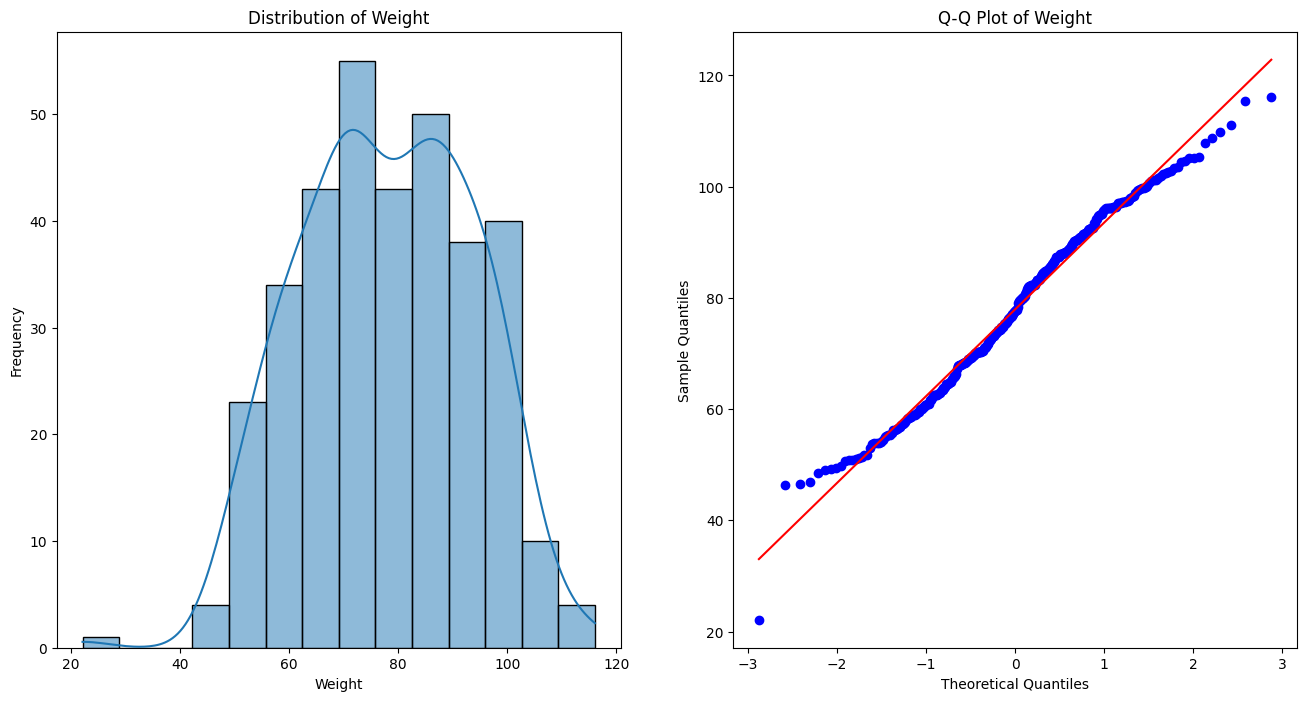

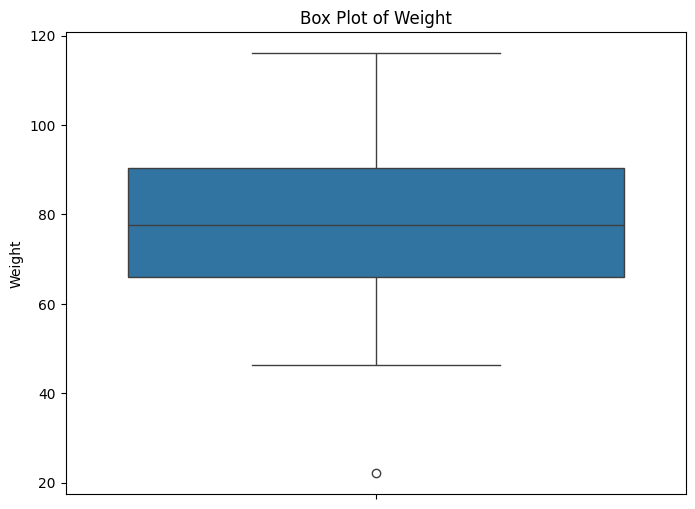

In [ ]:
plt.figure(figsize=(16, 8))

# Distribution of Weight
plt.subplot(1, 2, 1)
sns.histplot(data=df['weight'], kde=True)
plt.title("Distribution of Weight")
plt.xlabel("Weight")
plt.ylabel("Frequency")

# Q-Q Plot of Weight
plt.subplot(1, 2, 2)
stats.probplot(df['weight'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Weight')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Box Plot of Weight
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['weight'])
plt.title('Box Plot of Weight')
plt.ylabel('Weight')

plt.show()


In [ ]:
q1 = df['weight'].quantile(.25)
q3 = df['weight'].quantile(.75)
minimum_weight = q1 - (1.5 * (q3-q1))
print(minimum_weight)
maximum_weight = q3 + (1.5 * (q3-q1))
print(maximum_weight)

29.64223719999999
126.71092519999999


In [ ]:
df[df['weight'] < minimum_weight]

patient_id given_name   surname         full_name assigned_sex    weight  \
138         211    Camilla  Zaitseva  camilla zaitseva       female  22.13529   

     height   birthdate  age       bmi   bmi_status  start_dose  end_dose  \
138  1.6002  1938-11-26   81  8.644436  Underweight        28.0      37.0   

     hba1c_start  hba1c_end  hba1c_change drug_type  
138         7.53       7.13           0.4   Auralin

#### Insights of Weight

**Distribution of Weight**

- **Normality:** The histogram suggests a roughly normal distribution of weight with a slight right skew. The peak is around 80, indicating that most values are concentrated around this point.
- **Range:** The values range from approximately 20 to 120, with a majority of data points falling between 60 and 100.

**Q-Q Plot of Weight**

- **Normality:** The Q-Q plot confirms the near-normal distribution of weight. The points follow a straight line quite closely, indicating that the observed quantiles are similar to those expected from a normal distribution.
- **Slight Deviation:** There's a slight deviation from the line in the upper tail, suggesting a slightly heavier tail than a perfectly normal distribution. However, this deviation is not severe.

**BOX Plot Of Weight**

- Median Weight: The median weight is around 80, indicating that the majority of individuals in the sample weigh around 80 units.
- IQR: The IQR, which represents the middle 50% of the data, is approximately 30 units, suggesting a moderate spread of weight values.

**Overall**

- The weight data is approximately normally distributed, with a slight right skew and heavier tails than a perfectly normal distribution.
- The outlier identified in the box plot, with a weight of 22.13529, is significantly lower than the rest of the data. This might indicate an unusual case or potential data error.


In [ ]:
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.17780000000000018

In [ ]:
skew(df.height)

0.1518299245372368

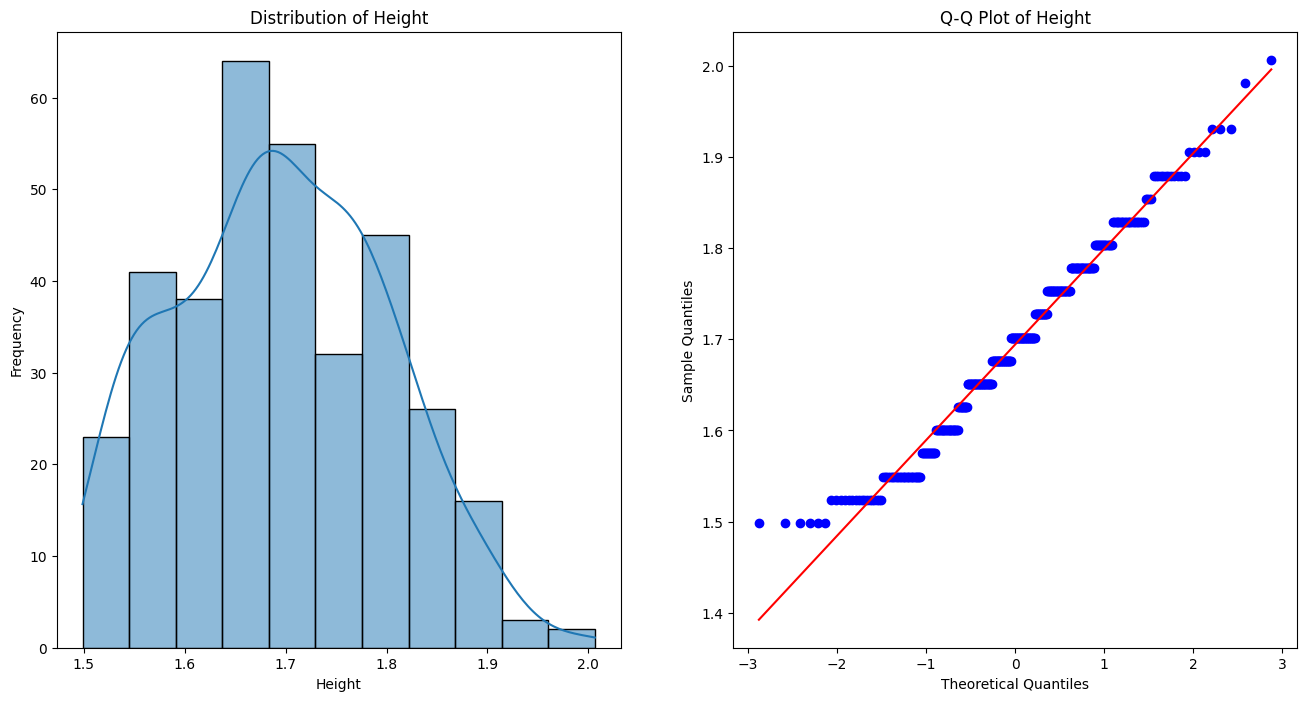

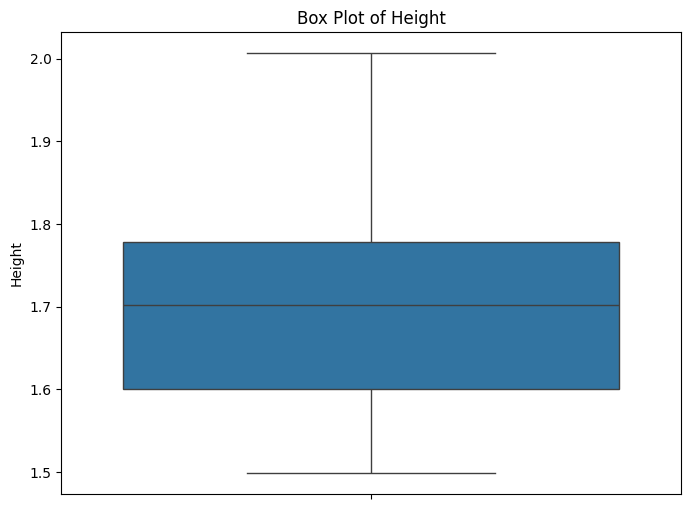

In [ ]:
plt.figure(figsize=(16, 8))

# Distribution of Height
plt.subplot(1, 2, 1)
sns.histplot(data=df['height'], kde=True)
plt.title("Distribution of Height")
plt.xlabel("Height")
plt.ylabel("Frequency")

# Q-Q Plot of Height
plt.subplot(1, 2, 2)
stats.probplot(df['height'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Height')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Box Plot of Weight
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['height'])
plt.title('Box Plot of Height')
plt.ylabel('Height')

plt.show()


#### Insights of Height

**Distribution of Height**

- **Normality:** The histogram suggests a roughly normal distribution of height with a slight right skew. The peak is around 1.75, indicating that most values are concentrated around this point.
- **Range:** The values range from approximately 1.5 to 2.0, with a majority of data points falling between 1.6 and 1.9.

**Q-Q Plot of Height**

- **Normality:** The Q-Q plot confirms the near-normal distribution of height. The points follow a straight line quite closely, indicating that the observed quantiles are similar to those expected from a normal distribution.
- **Slight Deviation:** There's a slight deviation from the line in the upper tail, suggesting a slightly heavier tail than a perfectly normal distribution. However, this deviation is not severe.

**BOX Plot of Height**
- Median Height: The median height is around 1.75, indicating that the majority of individuals in the sample are around 1.75 meters tall.
- IQR: The IQR, which represents the middle 50% of the data, is approximately 0.18 meters, suggesting a moderate spread of height values.
Outliers: There are no visible outliers in the box plot, indicating that there are no exceptionally high or low height values in the sample.

**Overall**

- The height data is approximately normally distributed, with a slight right skew and heavier tails than a perfectly normal distribution.



In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
IQR

43.0

In [ ]:
skew(df.age)

-0.14556355512534924

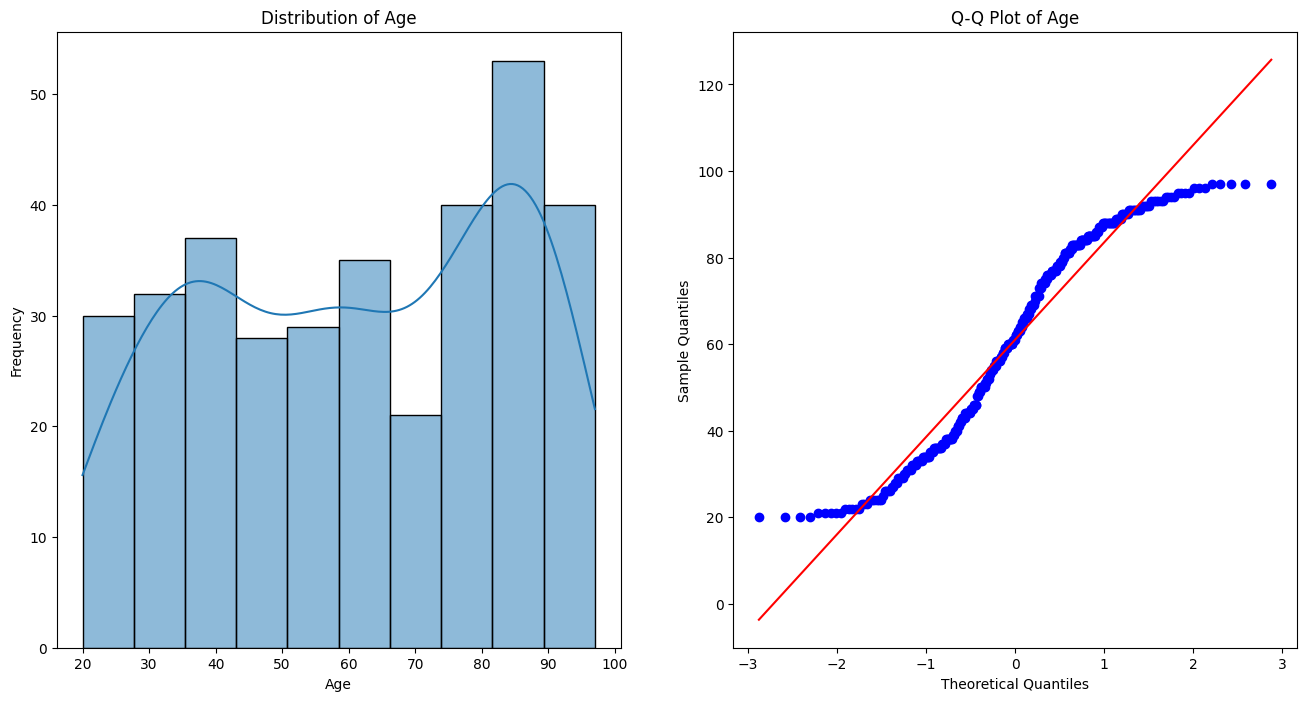

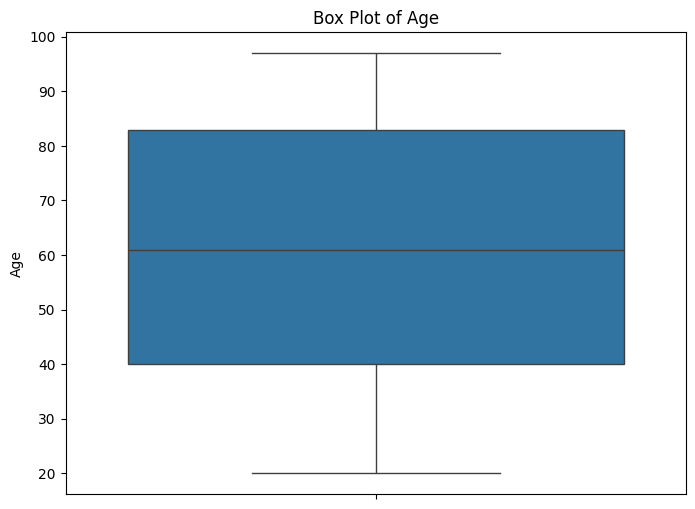

In [ ]:
plt.figure(figsize=(16, 8))

# Distribution of Age
plt.subplot(1, 2, 1)
sns.histplot(data=df['age'], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Q-Q Plot of Age
plt.subplot(1, 2, 2)
stats.probplot(df['age'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Box Plot of Age
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')

plt.show()


#### Insights from the Combined Plots

**Distribution of Age**

- **Normality:** The histogram suggests a roughly normal distribution of age with a slight left skew. The peak is around 65, indicating that most values are concentrated around this point.
- **Range:** The values range from approximately 20 to 100, with a majority of data points falling between 40 and 80.

**Q-Q Plot of Age**

- **Normality:** The Q-Q plot confirms the near-normal distribution of age. The points follow a straight line quite closely, indicating that the observed quantiles are similar to those expected from a normal distribution.
- **Slight Deviation:** There's a slight deviation from the line in the lower tail, suggesting a slightly heavier tail than a perfectly normal distribution. However, this deviation is not severe.

**BOX Plot of Age**

- Median Age: The median age is around 65, indicating that the majority of individuals in the sample are 65 years old.
- IQR: The IQR, which represents the middle 50% of the data, is approximately 43 years, suggesting a moderate spread of age values.
- Outliers: There are no visible outliers in the box plot, indicating that there are no exceptionally high or low age values in the sample.

**Overall**

- The age data is approximately normally distributed, with a slight left skew and heavier tails than a perfectly normal distribution.



In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
IQR

8.312800326279934

In [ ]:
skew(df['bmi'])

0.024784126202799777

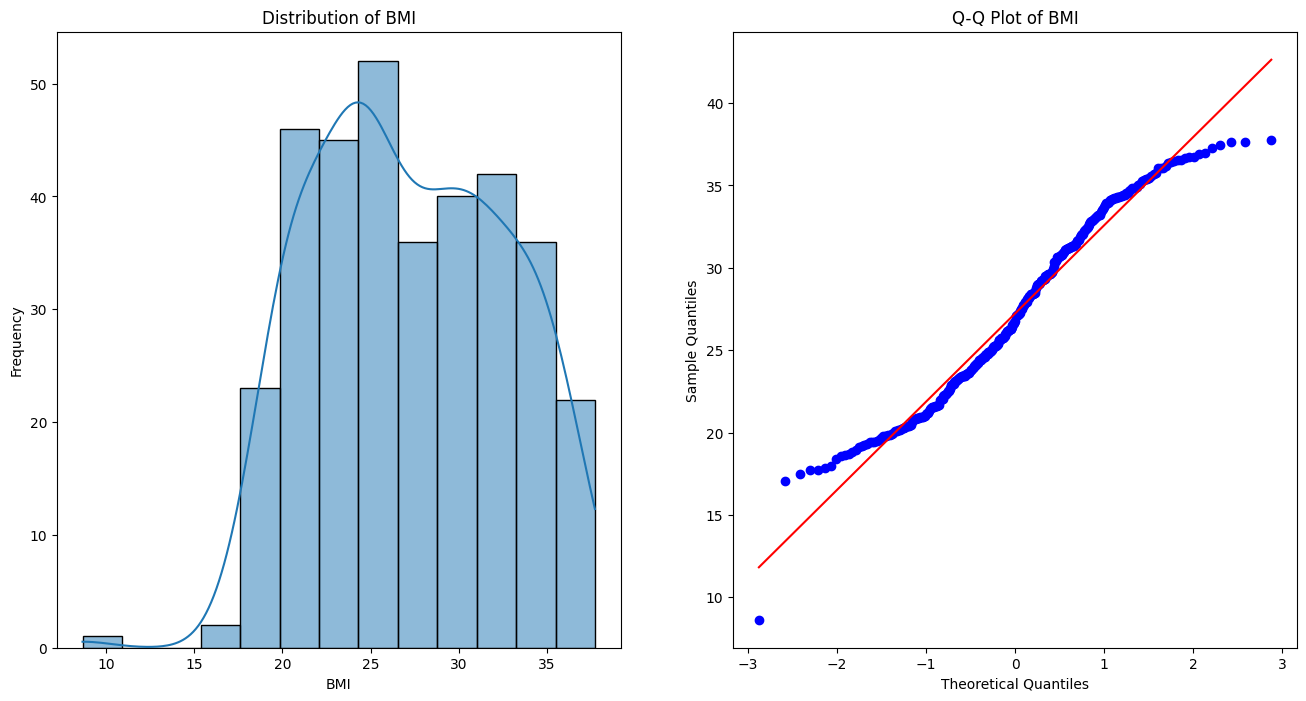

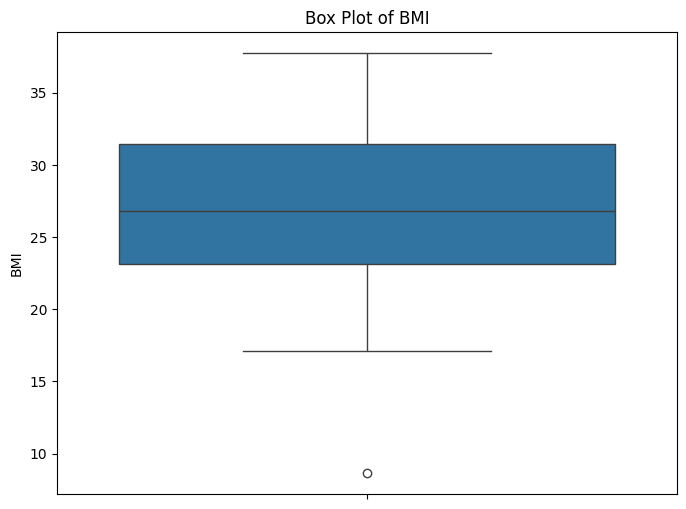

In [ ]:
plt.figure(figsize=(16, 8))

# Distribution of BMI
plt.subplot(1, 2, 1)
sns.histplot(data=df['bmi'], kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")

# Q-Q Plot of BMI
plt.subplot(1, 2, 2)
stats.probplot(df['bmi'], dist="norm", plot=plt)
plt.title('Q-Q Plot of BMI')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Box Plot of BMI
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['bmi'])
plt.title('Box Plot of BMI')
plt.ylabel('BMI')

plt.show()


In [ ]:
q1 = df['bmi'].quantile(.25)
q3 = df['bmi'].quantile(.75)
minimum_bmi = q1 - (1.5 * (q3-q1))
print(minimum_bmi)
maximum_bmi = q3 + (1.5 * (q3-q1))
print(maximum_bmi)

10.668896736982845
43.92009804210258


In [ ]:
df[df['bmi'] < minimum_bmi]

patient_id given_name   surname         full_name assigned_sex    weight  \
138         211    Camilla  Zaitseva  camilla zaitseva       female  22.13529   

     height   birthdate  age       bmi   bmi_status  start_dose  end_dose  \
138  1.6002  1938-11-26   81  8.644436  Underweight        28.0      37.0   

     hba1c_start  hba1c_end  hba1c_change drug_type  
138         7.53       7.13           0.4   Auralin

#### Insights of BMI

**Distribution of BMI**

- **Normality:** The histogram suggests a roughly normal distribution of BMI with a slight right skew. The peak is around 25, indicating that most values are concentrated around this point.
- **Range:** The values range from approximately 10 to 45, with a majority of data points falling between 20 and 35.

**Q-Q Plot of BMI**

- **Normality:** The Q-Q plot confirms the near-normal distribution of BMI. The points follow a straight line quite closely, indicating that the observed quantiles are similar to those expected from a normal distribution.
- **Slight Deviation:** There's a slight deviation from the line in the upper tail, suggesting a slightly heavier tail than a perfectly normal distribution. However, this deviation is not severe.

**BOX Plot of BMI**
- Distribution: The box plot shows a relatively symmetrical distribution of BMI, with a clear median line and whiskers extending to the upper and lower quartiles.
- Range: The range of BMI values seems to be from approximately 10 to 35, with the majority of individuals falling within the interquartile range (IQR) between 20 and 30.
- Outlier: There is one outlier present in the lower tail of the distribution, indicating an unusually low BMI value.

**Overal**

- The BMI data is approximately normally distributed, with a slight right skew and heavier tails than a perfectly normal distribution.
- The outlier identified in the box plot, with a BMI of 8.644436, is significantly lower than the rest of the data. This might indicate an unusual case or potential data error.

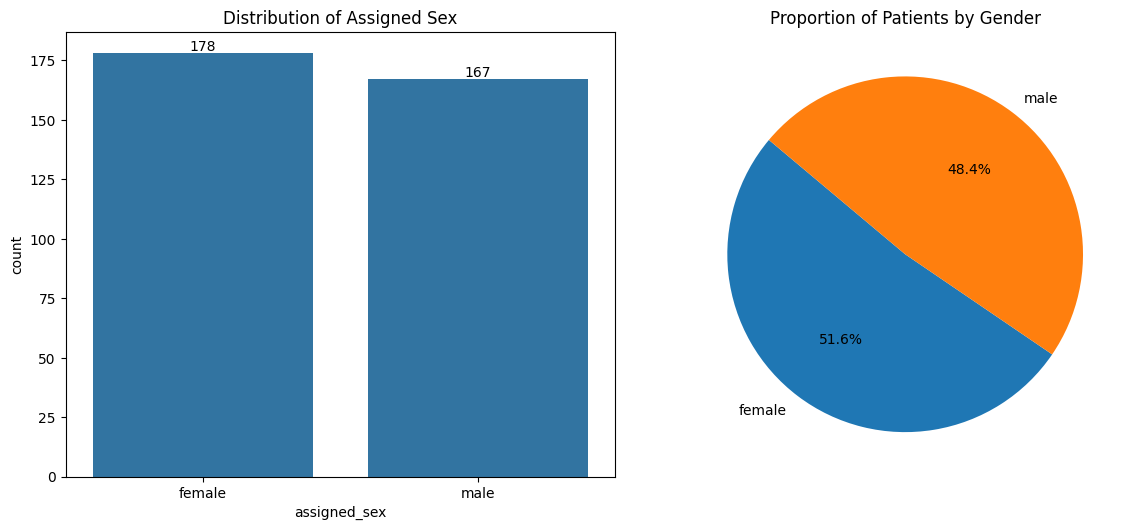

In [ ]:
plt.figure(figsize=(12, 10))

# Count Plot for Gender
plt.subplot(2, 2, 1)
ax = sns.countplot(data=df, x='assigned_sex', order=df['assigned_sex'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Assigned Sex')

# Pie Chart for Proportion of Patients by Gender
plt.subplot(2, 2, 2)
gender_counts = df['assigned_sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Patients by Gender')

# Adjust layout
plt.tight_layout()
plt.show()


#### Insights of Assigned Sex

**Distribution of Assigned Sex**

- **Gender Balance:** The bar chart shows a relatively balanced distribution of assigned sexes, with similar frequencies for female and male.
- **Female Majority:** While the difference is minimal, there is a slightly higher proportion of females compared to males.

**Proportion of Patients by Gender**

- **Female Dominance:** The pie chart confirms the female-dominated distribution. Females account for 51.6% of the patients, while males account for 48.4%.
- **Visual Representation:** The pie chart provides a clear visual representation of the gender proportions.

**Overall**

- The data indicates a slight female predominance in the sample, with 51.6% of patients being female and 48.4% being male.
- Despite the female-dominated distribution, the overall gender balance is relatively even.

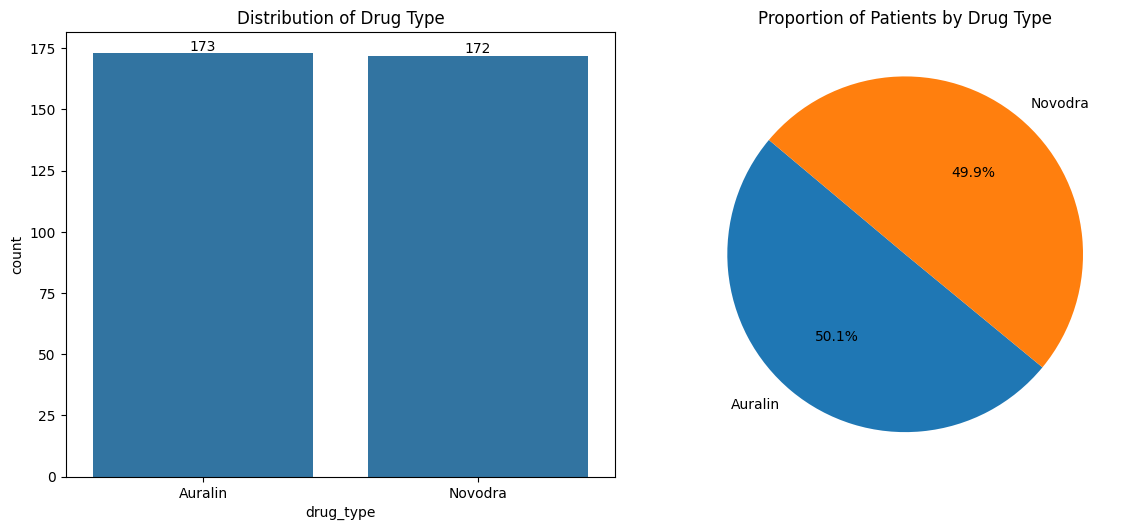

In [ ]:
plt.figure(figsize=(12, 10))

# Count Plot for Drug Type
plt.subplot(2, 2, 1)
ax = sns.countplot(data=df, x='drug_type', order=df['drug_type'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Drug Type')

# Pie Chart for Proportion of Patients by Drug Type
plt.subplot(2, 2, 2)
gender_counts = df['drug_type'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Patients by Drug Type')

# Adjust layout
plt.tight_layout()
plt.show()


#### Insights of Drug Type

**Distribution of Drug Type**

- **Balanced Distribution:** The bar chart shows a relatively balanced distribution of drug types, with Auralin and Novodra having similar frequencies.
- **No Dominant Drug Type:** Neither Auralin nor Novodra is significantly more prevalent than the other.

**Proportion of Patients by Drug Type**

- **Equal Distribution:** The pie chart confirms the balanced distribution of drug types. Auralin and Novodra account for approximately equal proportions of patients.
- **Visual Representation:** The pie chart provides a clear visual representation of the equal distribution.

**Overall**

- The data indicates that Auralin and Novodra are prescribed or used in similar proportions, suggesting no strong preference for one drug type over the other.
- The pie chart further emphasizes the balanced distribution of drug types.

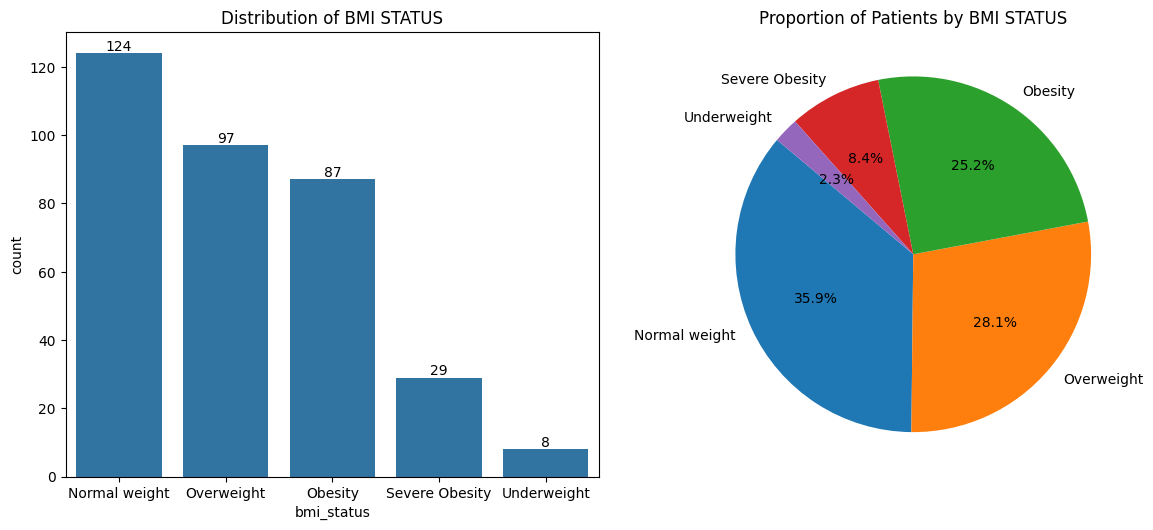

In [ ]:
plt.figure(figsize=(12, 10))

# Count Plot for BMI Status
plt.subplot(2, 2, 1)
ax = sns.countplot(data=df, x='bmi_status', order=df['bmi_status'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Distribution of BMI STATUS')

# Pie Chart for Proportion of Patients by BMI Status
plt.subplot(2, 2, 2)
gender_counts = df['bmi_status'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Patients by BMI STATUS')

# Adjust layout
plt.tight_layout()
plt.show()


#### Insights of BMI STATUS

**Distribution of BMI Status**

- **Prevalence of Normal Weight:** The bar chart shows that "Normal weight" is the most prevalent BMI status, followed by "Overweight" and "Obesity."
- **Lower Prevalence of Underweight and Severe Obesity:** "Underweight" and "Severe Obesity" have the lowest frequencies, indicating that these categories are less common in the sample.

**Proportion of Patients by BMI Status**

- **Dominance of Normal Weight:** The pie chart confirms the dominance of "Normal weight," accounting for 35.9% of the patients.
- **Other Categories:** "Overweight" and "Obesity" have significant proportions, while "Underweight" and "Severe Obesity" have smaller percentages.

**Overall Conclusions**

- **Normal Weight is Prevalent:** The data indicates that a majority of patients fall into the "Normal weight" category, followed by "Overweight" and "Obesity."
- **Lower Prevalence of Extreme Categories:** "Underweight" and "Severe Obesity" are less common in the sample.While "Normal weight" is dominant, the overall distribution of BMI status is relatively balanced, with no extremely skewed categories.

## Bi-Veriate Analysis

### NUmerical Vs Numerical

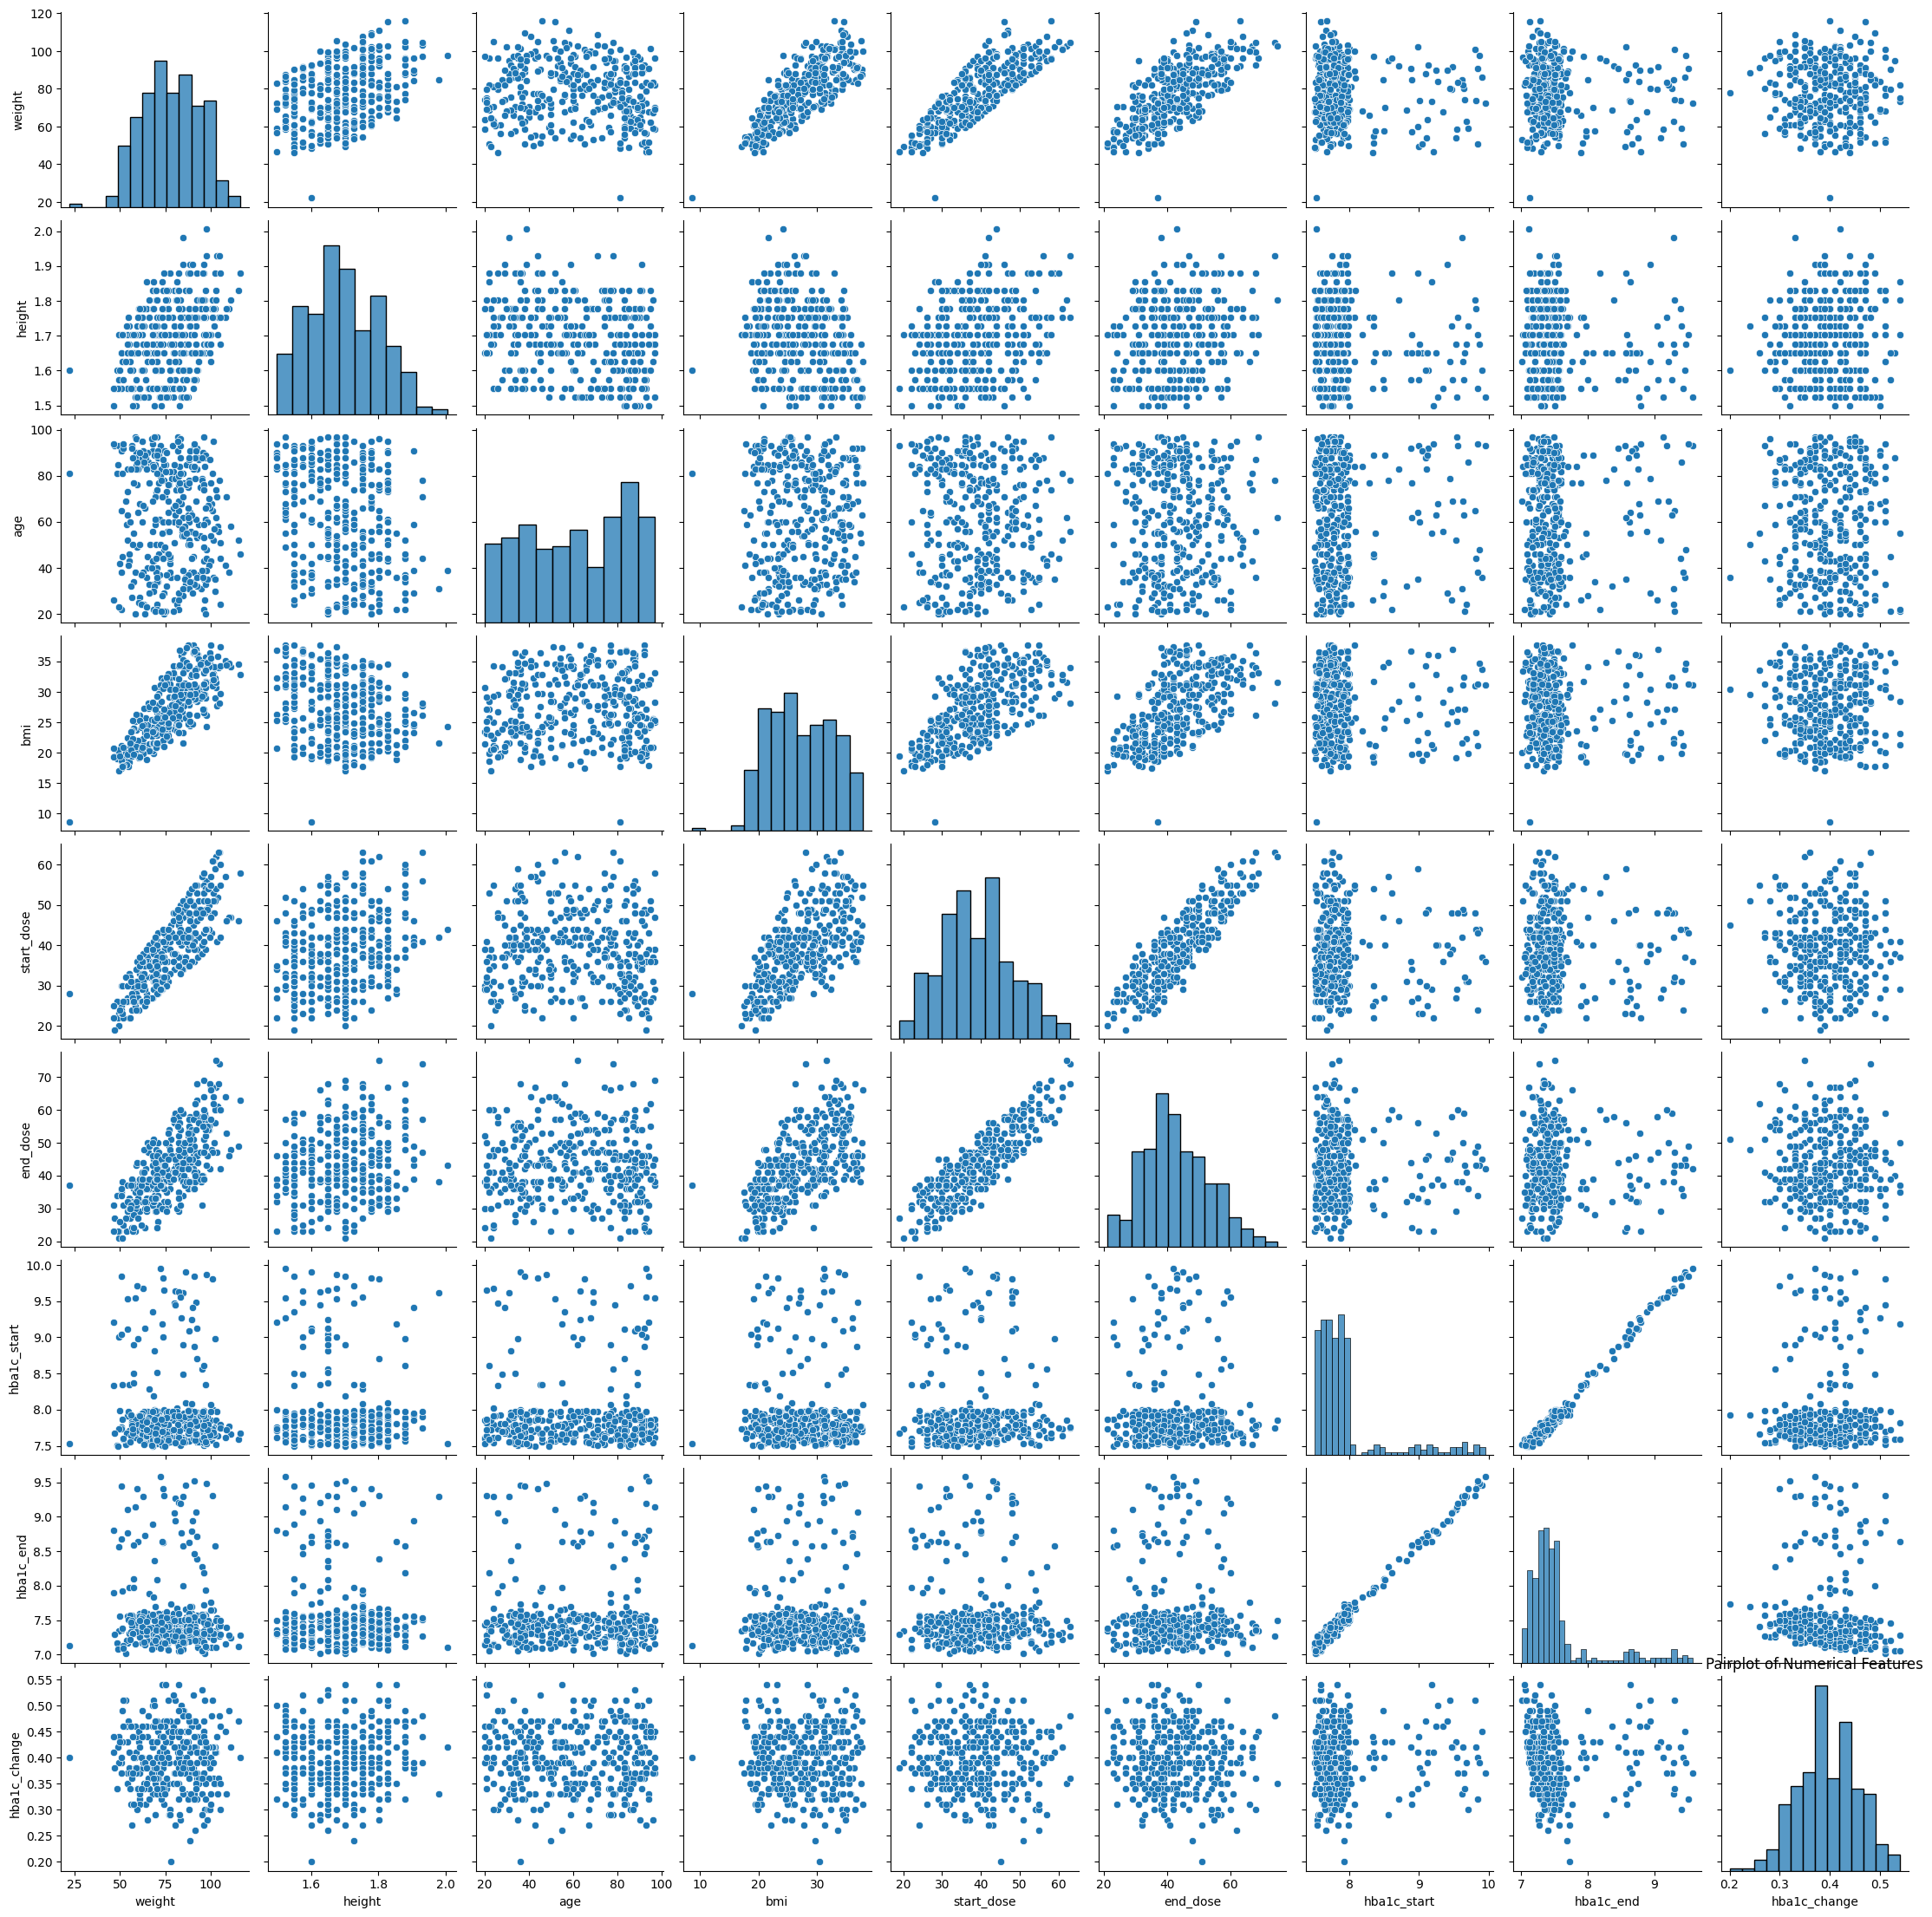

In [ ]:
# List of numerical columns
numerical_columns = ['weight', 'height', 'age', 'bmi', 'start_dose', 'end_dose', 'hba1c_start', 'hba1c_end', 'hba1c_change']

# Pairplot for all numerical columns
sns.pairplot(df[numerical_columns])
plt.title('Pairplot of Numerical Features')
plt.show()


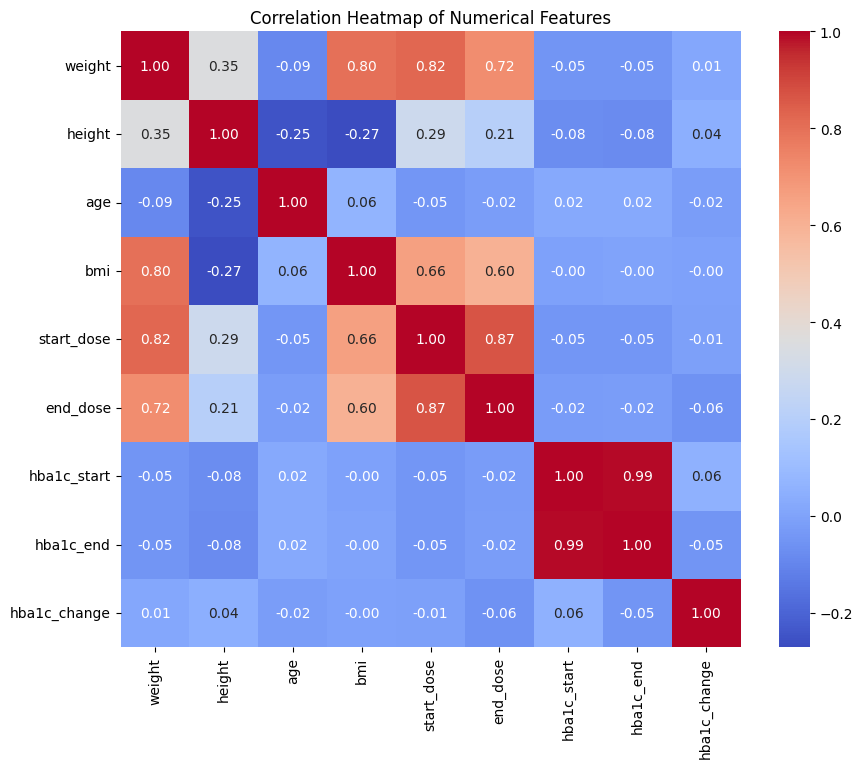

In [ ]:
# List of numerical columns
numerical_columns = ['weight', 'height', 'age', 'bmi', 'start_dose', 'end_dose', 'hba1c_start', 'hba1c_end', 'hba1c_change']

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### Insights from the Correlation Heatmap

- **Strong Positive Correlations:** There are strong positive correlations between:
    - `start_dose` and `end_dose`
    - `hbalc_start` and `hbalc_end`
    - `weight` and `bmi`
- **Moderate Positive Correlations:** There are moderate positive correlations between:
    - `height` and `weight`
    - `start_dose` and `bmi`
    - `end_dose` and `bmi`
- **Weak or No Correlations:** Other variables show weak or no correlations, indicating limited relationships.
- **Correlation Coefficients:** The numerical values in the heatmap represent the correlation coefficients, ranging from -1 to 1. A value of 1 indicates a perfect positive correlation, while -1 indicates a perfect negative correlation.
- **Positive Correlations:** The strong positive correlations between `start_dose` and `end_dose`, `hbalc_start` and `hbalc_end`, and `weight` and `bmi` suggest that these variables are closely related.
- **Weak or Negligible Correlations:** The near-zero correlations between `hbalc_change` and the other variables indicate that changes in hbalc levels are not strongly influenced by the starting or ending doses, initial hbalc levels, weight, height, or age.

**Conclusion**

- The correlation heatmap provides valuable insights into the relationships between the variables. The strong positive correlations between `start_dose`, `end_dose`, `hbalc_start`, and `hbalc_end` highlight the importance of these variables in predicting outcomes.
- The weak or negligible correlations involving `hbalc_change` suggest that other factors might be more influential in determining changes in hbalc levels.


### Numerical VS Categorical

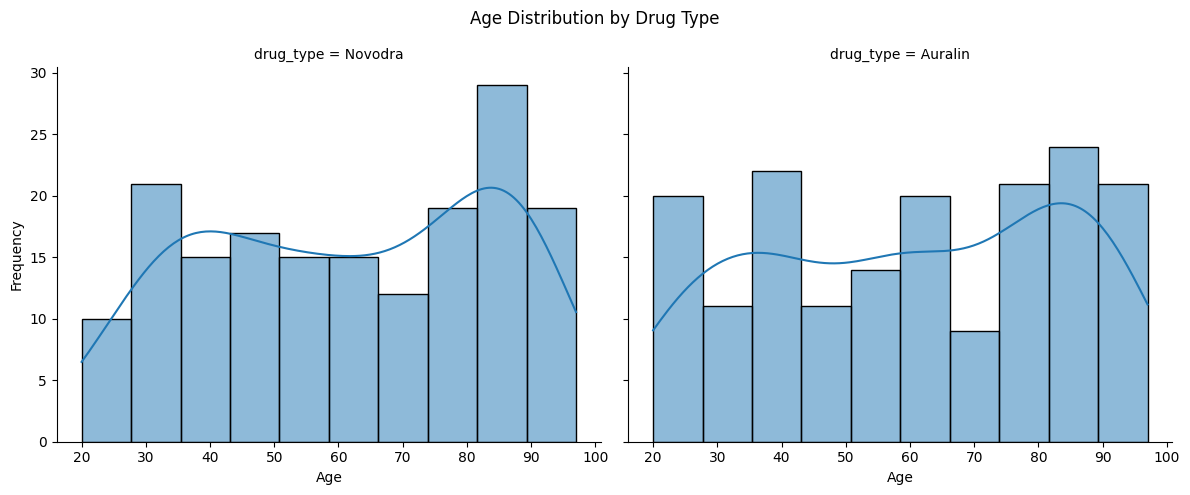

In [ ]:
g = sns.FacetGrid(data=df, col="drug_type", height=5, aspect=1.2)
g.map(sns.histplot, "age", bins=10, kde=True)
g.set_axis_labels("Age", "Frequency")
g.fig.suptitle("Age Distribution by Drug Type")

plt.tight_layout()
plt.show()

#### Insights from the Age Distribution by Drug Type

- **Drug Type Influence:** Age distribution differs between patients taking Novodra and Auralin.
- **Younger Patients on Novodra:** Novodra is more common in younger patients.
- **Older Patients on Auralin:** Auralin is more common in older patients.
- **Overlapping Distributions:** Age is not the sole determinant of drug prescription, as there is some overlap.


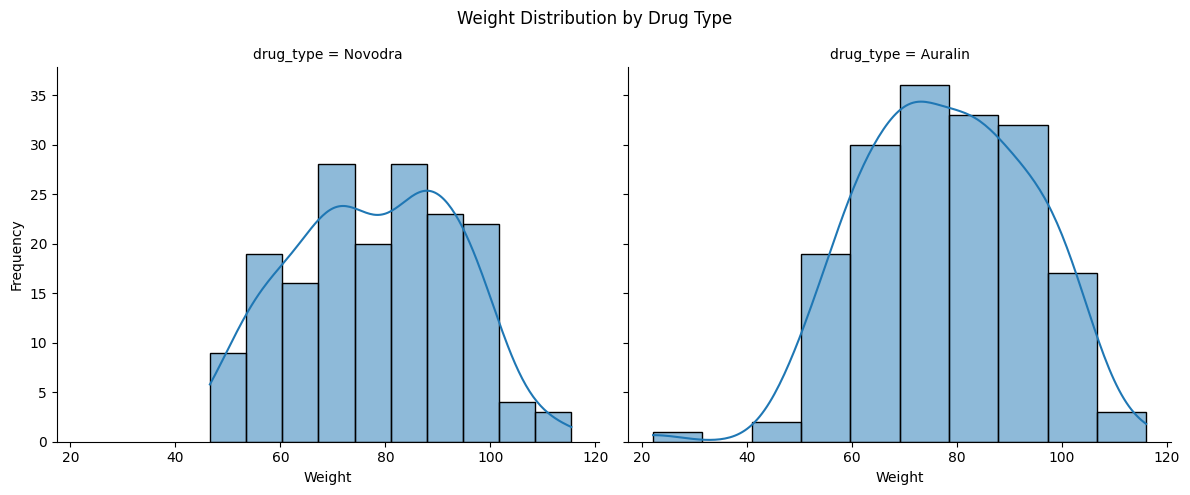

In [ ]:
g = sns.FacetGrid(data=df, col="drug_type", height=5, aspect=1.2)
g.map(sns.histplot, "weight", bins=10, kde=True)
g.set_axis_labels("Weight", "Frequency")
g.fig.suptitle("Weight Distribution by Drug Type")

plt.tight_layout()
plt.show()

#### Insights from the Weight Distribution by Drug Type

- **Drug Type Influence on Weight Distribution:** The histograms show differences in weight distribution between patients taking Novodra and Auralin.
- **Similar Distributions:** Despite the differences, the overall distributions of weight for both drug types are relatively similar.
- **Skewness:** Both distributions exhibit a slight right skew, indicating that there is a tail in the distribution extending towards higher weight values.

- **Novodra:** The histogram for Novodra shows a slightly wider spread of weight values compared to Auralin.
- **Auralin:** The histogram for Auralin shows a slightly narrower distribution of weight values compared to Novodra.


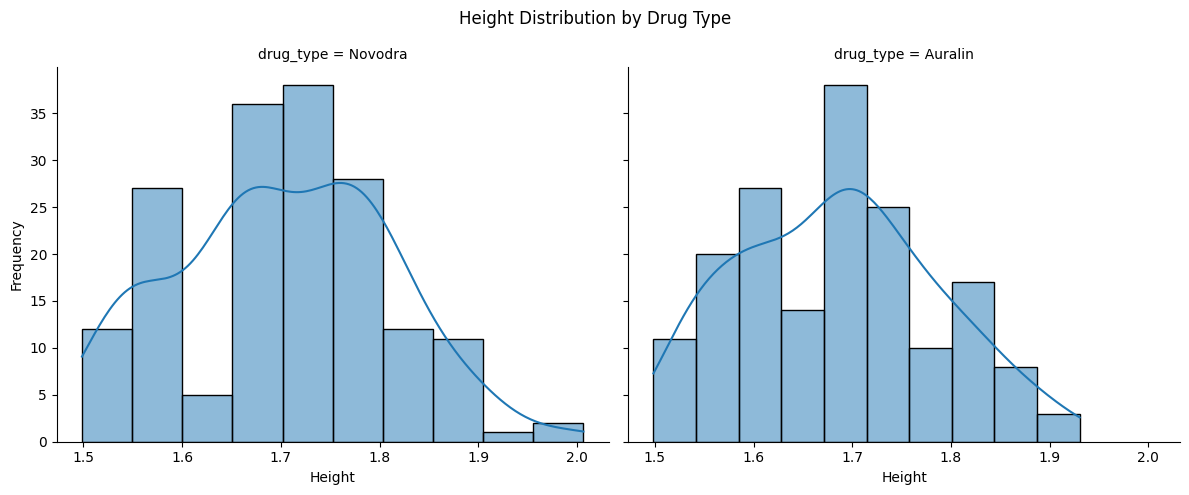

In [ ]:
g = sns.FacetGrid(data=df, col="drug_type", height=5, aspect=1.2)
g.map(sns.histplot, "height", bins=10, kde=True)
g.set_axis_labels("Height", "Frequency")
g.fig.suptitle("Height Distribution by Drug Type")

plt.tight_layout()
plt.show()

#### Insights from the Height Distribution by Drug Type

- **Drug Type Influence on Height Distribution:** The histograms show differences in height distribution between patients taking Novodra and Auralin.
- **Similar Distributions:** Despite the differences, the overall distributions of height for both drug types are relatively similar.
- **Skewness:** Both distributions exhibit a slight right skew, indicating that there is a tail in the distribution extending towards higher height values.
- **Novodra:** The histogram for Novodra shows a slightly wider spread of height values compared to Auralin.
- **Auralin:** The histogram for Auralin shows a slightly narrower distribution of height values compared to Novodra.


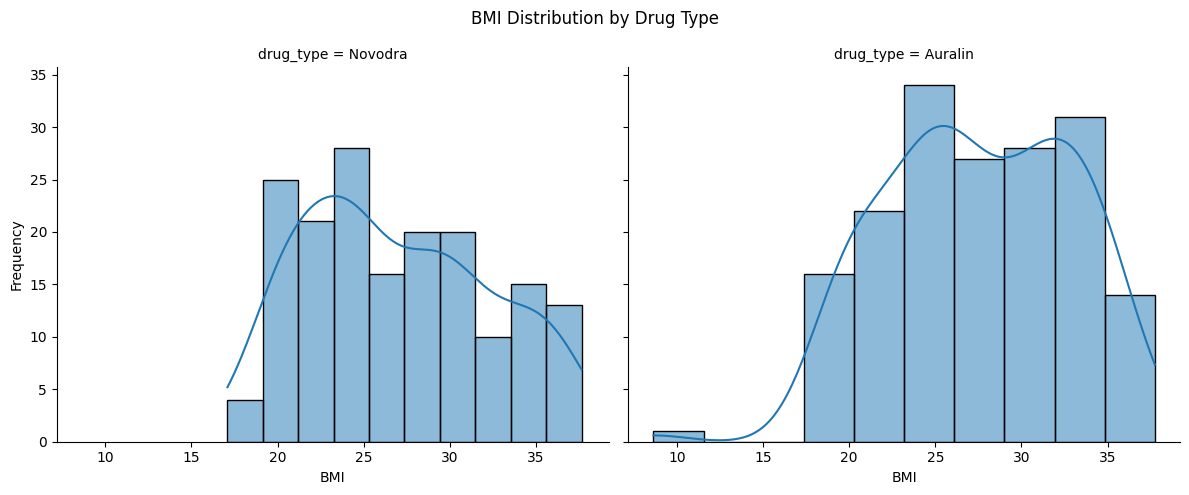

In [ ]:
g = sns.FacetGrid(data=df, col="drug_type", height=5, aspect=1.2)
g.map(sns.histplot, "bmi", bins=10, kde=True)
g.set_axis_labels("BMI", "Frequency")
g.fig.suptitle("BMI Distribution by Drug Type")

plt.tight_layout()
plt.show()

#### Insights from the BMI Distribution by Drug Type

- **Drug Type Influence on BMI Distribution:** The histograms show differences in BMI distribution between patients taking Novodra and Auralin.
- **Similar Distributions:** Despite the differences, the overall distributions of BMI for both drug types are relatively similar.
- **Skewness:** Both distributions exhibit a slight right skew, indicating that there is a tail in the distribution extending towards higher BMI values.
- **Novodra:** The histogram for Novodra shows a slightly wider spread of BMI values compared to Auralin.
- **Auralin:** The histogram for Auralin shows a slightly narrower distribution of BMI values compared to Novodra.

<ipython-input-210-406326a02f30>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='drug_type', y='hba1c_change', palette='Set2', inner='quartile', linewidth=1.5)


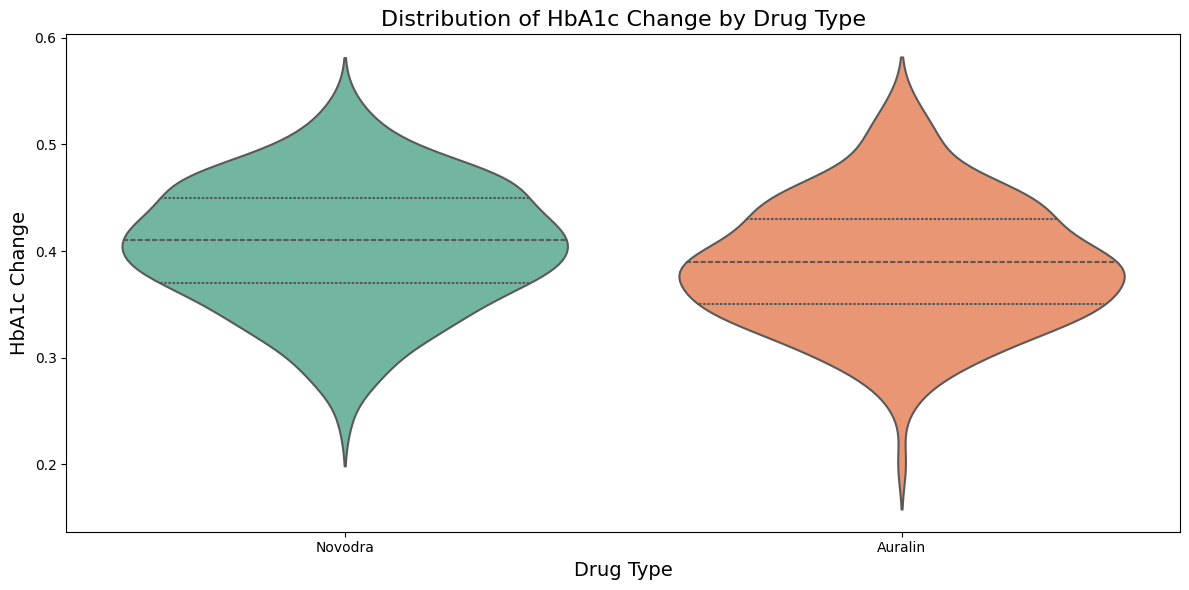

In [ ]:
plt.figure(figsize=(12, 6))

# Create the violin plot with additional features
sns.violinplot(data=df, x='drug_type', y='hba1c_change', palette='Set2', inner='quartile', linewidth=1.5)

# Set the title and labels
plt.title('Distribution of HbA1c Change by Drug Type', fontsize=16)
plt.xlabel('Drug Type', fontsize=14)
plt.ylabel('HbA1c Change', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


#### Insights from the Violine Plot

**Distribution Shapes:**
   - **Novodra:** The violin plot for Novodra exhibits a more symmetrical shape, suggesting a relatively uniform distribution of HbA1c changes among patients.
   - **Auralin:** The violin plot for Auralin shows a slightly wider and more elongated shape, indicating a wider range of HbA1c changes among patients treated with this drug.

**Median HbA1c Change:**
   - **Novodra:** The median HbA1c change for Novodra appears to be slightly higher than that of Auralin. This suggests that, on average, patients treated with Novodra experienced a greater reduction in HbA1c levels compared to those treated with Auralin.

**Interquartile Range (IQR):**
   - The IQR, represented by the horizontal lines within the violin plots, provides insight into the variability of HbA1c changes within each drug group.
   - The IQR for Novodra seems to be slightly narrower than that of Auralin, indicating a smaller spread of HbA1c changes among patients treated with Novodra.

- Both Novodra and Auralin can effectively reduce HbA1c levels, but the distribution of changes differs between the two drugs.
- ** Novodra appears to have a more consistent effect on HbA1c reduction, with a narrower range of outcomes.
- Auralin, on the other hand, may exhibit a wider range of responses, with some patients experiencing more significant reductions in HbA1c levels than others.

### Categorical VS Categorical

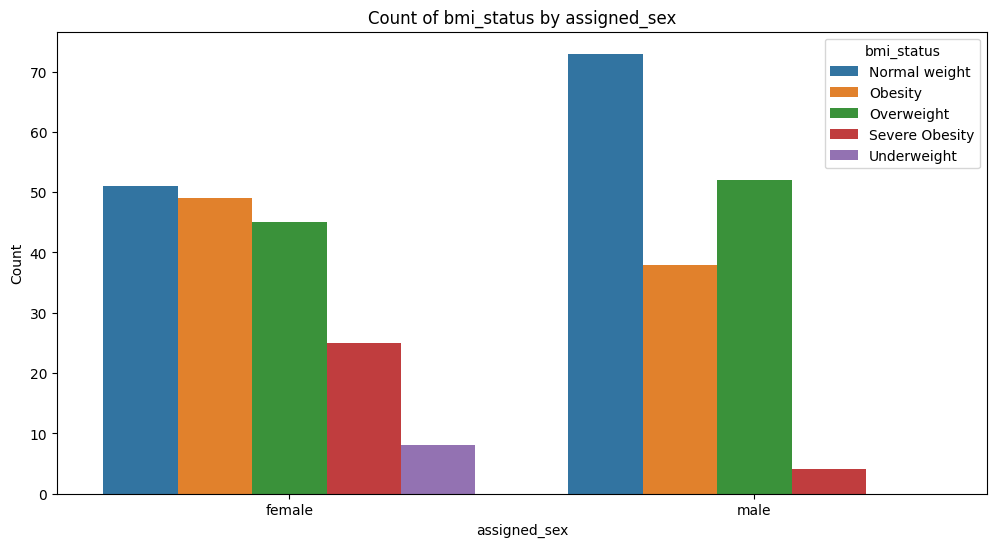

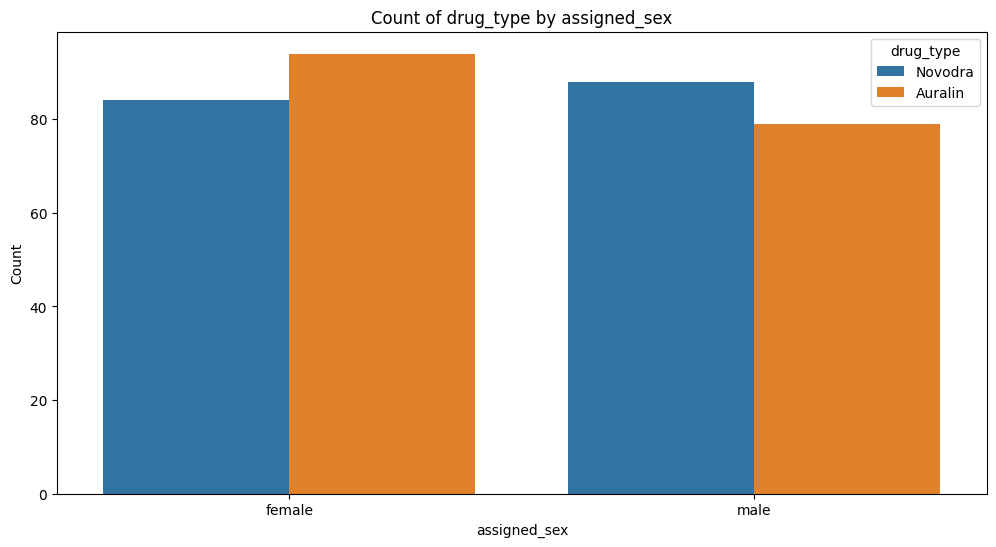

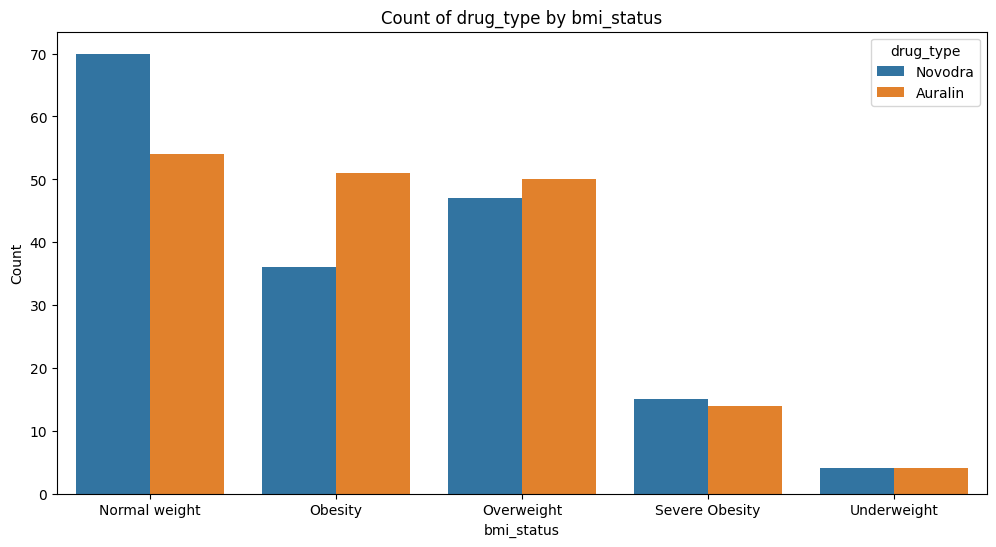

In [ ]:
categorical_columns = ['assigned_sex', 'bmi_status', 'drug_type']
# Count plots for categorical columns
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=categorical_columns[i], hue=categorical_columns[j])
        plt.title(f'Count of {categorical_columns[j]} by {categorical_columns[i]}')
        plt.xlabel(categorical_columns[i])
        plt.ylabel('Count')
        plt.show()

**Insights on BMI Status by Assigned Sex**
- **Gender Disparity**: There is a notable difference in BMI status between males and females, indicating that gender influences body weight categories.
- **Obesity Trends**:
  - **Males** exhibit higher rates of obesity, severe obesity, and overweight compared to females.
  - **Females** show a significantly higher rate of underweight compared to males.
- **Normal Weight Similarity**: Both genders have relatively similar proportions of individuals classified as having normal weight.
- **General Trends**:
  - Males dominate the higher BMI categories, particularly obesity.
  - Females are more likely to be underweight, suggesting a need for targeted health interventions for this group.

**Insights on Drug Type Distribution by Assigned Sex**
- **Gender-Based Preferences**: The analysis reveals variations in drug type distribution based on gender.
- **Drug Preferences**:
  - **Females** show a higher inclination towards **Novodra**.
  - **Males** display a greater preference for **Auralin**.
- **Balanced Distribution**: Despite the slight gender preferences, the overall distribution of drug types remains relatively balanced, indicating both drugs are prescribed across genders.

**Insights on Drug Type Distribution by BMI Status**
- **Drug Type Variation by BMI**:
  - Individuals categorized as **Normal weight** are more frequently prescribed **Novodra**.
  - **Auralin** is predominantly prescribed to individuals classified as **Overweight** and **Obese**.
- **Low Prescription Rates**: Both drug types have limited prescriptions for individuals categorized as **Severe Obesity** and **Underweight**, indicating potential gaps in treatment options or varying clinical guidelines for these groups.

**Conclusion**
- The analysis indicates that **gender** and **BMI status** play crucial roles in health and treatment outcomes.

## Multiveriate Analysis

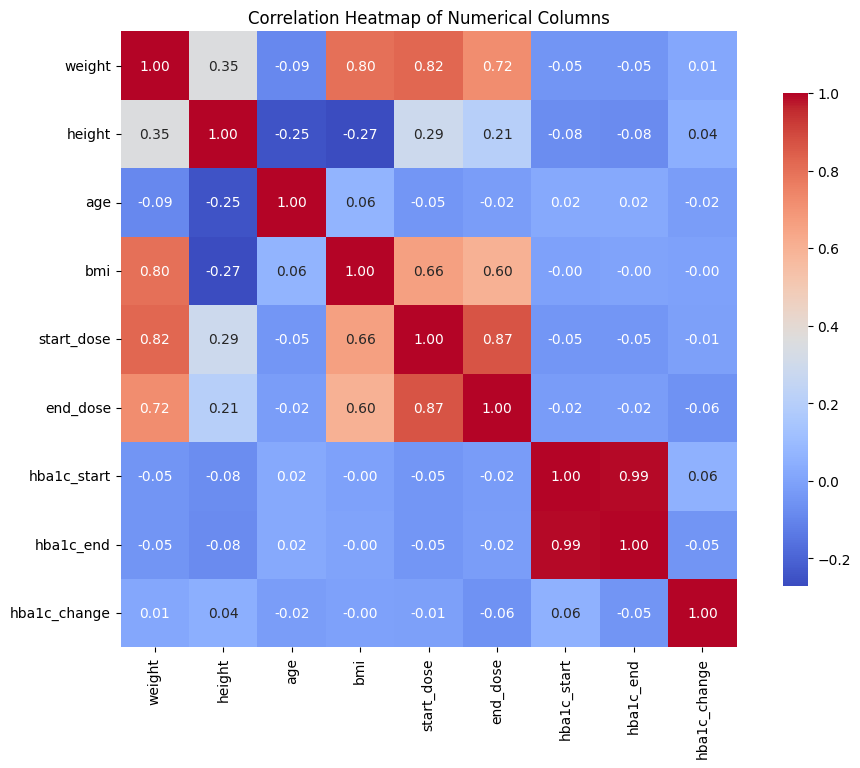

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


#### Insights from the Heatmap

- **Normality:** The data for `start_dose`, `end_dose`, and `hbalc_change` are approximately normally distributed, which is beneficial for many statistical analyses.
- **Non-Normality:** The `hbalc_start` and `hbalc_end` data are not normally distributed, requiring potential transformations or non-parametric methods for analysis.
- **Outliers:** Outliers were identified in the weight and BMI data, suggesting potential data issues or unusual cases.
- **Strong Positive Correlations:**
    - `start_dose` and `end_dose`
    - `hbalc_start` and `hbalc_end`
    - `weight` and `bmi`
- **Moderate Positive Correlations:**
    - `height` and `weight`
    - `start_dose` and `bmi`
    - `end_dose` and `bmi`
- **Weak or No Correlations:** `hbalc_change` has weak or no correlations with other variables, suggesting other factors might influence hbalc changes.
- **Gender Balance:** The sample has a slight female predominance, but the distribution is relatively balanced.
- **Drug Type Distribution:** Novodra and Auralin are prescribed in similar proportions, with a slight preference for Novodra among females and Auralin among males.
- **BMI Status:** "Normal weight" is the most prevalent BMI status, followed by "Overweight" and "Obesity."


## Final Conclusion on Drug Performance and Efficiency

**Best Performing Drug**
   - **Auralin** appears to be the most effective drug in lowering HbA1c levels across various age groups. The analysis of the violin plots shows that patients using Auralin generally have a more significant reduction in HbA1c compared to those on Novodra.

**Age Group Efficiency**
   - The efficiency of Auralin is particularly pronounced in the **middle-aged group between 30-50 years. This age group tends to experience a more considerable reduction in HbA1c levels, suggesting that Auralin is well-suited for managing blood sugar levels in individuals within this demographic.
   - In contrast, Novodra may be more effective for younger individuals under 30, who might have different metabolic responses to medications.

**Factors Contributing to Efficiency**:
   - **Mechanism of Action**: Auralin’s mechanism, which may involve improving insulin sensitivity or enhancing glucose uptake in cells, could be more effective for middle-aged patients who often experience insulin resistance.
   - **Patient Compliance**: Auralin may also have a simpler dosing schedule or fewer side effects, leading to better patient adherence, which is crucial for long-term effectiveness.
   - **Comorbid Conditions**: The middle-aged population often has comorbid conditions like hypertension or high cholesterol, that Auralin may help manage simultaneously, enhancing its overall effectiveness.

**Comparison of Drug Types**:
   - **Novodra** is beneficial for younger individuals, potentially due to their generally better metabolic health and responsiveness to treatment. However, its impact on HbA1c change is less pronounced compared to Auralin in the middle-aged group.
   - For patients with severe obesity or those who are older over 50 years, both drugs may show limited effectiveness, indicating a need for tailored treatment plans that consider comprehensive lifestyle changes alongside medication.